In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as st, os, math, warnings

plt.rcParams["font.family"] = "Arial"  # Set global font to Arial

def scatter_reg(df_in, x, y, title, fname, if_legend = True):
    """Plot y vs x with best-fit line and R² labeled near the line; legend in one row."""
    print(fname)
    slope, intercept, r, p, _ = st.linregress(df_in[x], df_in[y])
    print(f"{y} = {intercept:.2f} {slope:+.4}·{x}\nR²={r**2:.2f}")
    line_x = np.linspace(df_in[x].min()*0.9, df_in[x].max()*1.1, 200)
    line_y = intercept + slope * line_x

    plt.figure(figsize=(4, 3), dpi=600)
    ax = sns.scatterplot(data=df_in, x=x, y=y, hue="Acid")
    plt.plot(line_x, line_y, "k--", lw=1)
    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel(y, fontsize=12)
    
    # Place the line equation near the line
    x_text = line_x[int(len(line_x) * 0.7)]  # choose a point around 70% along x
    y_text = intercept + slope * x_text
    plt.legend(ncol=len(df_in["Acid"].unique())/2, loc="upper center", bbox_to_anchor=(0.5, 1.3), fontsize=6)
    plt.tight_layout()
    plt.show()
    plt.close()


df = pd.read_csv('./summary_df.csv')
df['lnK']=np.log(df['k'])
df["AplusB"] = df["A"] + df["B"]
acidic = df[(df["Experiment"] == "acidic")].copy()
basic = df[(df["Experiment"] == "basic")].copy()

# optionally merge them for "combined" analysis
combined = pd.concat([acidic, basic], ignore_index=True)

In [2]:
metrics     = ["lnK", "A+B"]
descriptors = ["pKa", "Volume", "Number of Heavy Atoms", "L", "B1", "B5"]

def corr_matrix(df_in):
    return df_in[metrics + descriptors].corr().loc[metrics, descriptors]

corr_acidic   = corr_matrix(acidic)
corr_basic    = corr_matrix(basic)
corr_combined = corr_matrix(combined)

display(corr_acidic.round(2))
display(corr_basic.round(2))
display(corr_combined.round(2))

# Compute your correlation matrices
corr_acidic   = corr_matrix(acidic).round(2)
corr_basic    = corr_matrix(basic).round(2)
corr_combined = corr_matrix(combined).round(2)

# Create labeled separator rows
acidic_label   = pd.DataFrame(np.nan, index=["f"], columns=corr_acidic.columns)
basic_label    = pd.DataFrame(np.nan, index=["f"], columns=corr_basic.columns)
combined_label = pd.DataFrame(np.nan, index=["f"], columns=corr_combined.columns)

# Concatenate with empty rows
corr_all = pd.concat([
    corr_acidic,
    acidic_label,
    corr_basic,
    basic_label,
    corr_combined,
    combined_label
])

display(corr_all)

,pKa,Volume,Number of Heavy Atoms,L,B1,B5
lnK,-0.78,-0.12,0.07,-0.04,0.27,-0.11
A+B,-0.52,0.06,0.13,-0.24,0.33,0.06


,pKa,Volume,Number of Heavy Atoms,L,B1,B5
lnK,0.89,0.07,-0.21,0.26,-0.52,0.08
A+B,0.29,-0.19,-0.11,0.11,-0.24,-0.20


,pKa,Volume,Number of Heavy Atoms,L,B1,B5
lnK,0.27,0.01,-0.08,0.15,-0.22,0.01
A+B,-0.09,-0.07,0.00,-0.06,0.03,-0.08


,pKa,Volume,Number of Heavy Atoms,L,B1,B5
lnK,-0.78,-0.12,0.07,-0.04,0.27,-0.11
A+B,-0.52,0.06,0.13,-0.24,0.33,0.06
f,NaN,NaN,NaN,NaN,NaN,NaN
lnK,0.89,0.07,-0.21,0.26,-0.52,0.08
A+B,0.29,-0.19,-0.11,0.11,-0.24,-0.20
f,NaN,NaN,NaN,NaN,NaN,NaN
lnK,0.27,0.01,-0.08,0.15,-0.22,0.01
A+B,-0.09,-0.07,0.00,-0.06,0.03,-0.08
f,NaN,NaN,NaN,NaN,NaN,NaN


lnK_vs_pKa_acidic
lnK = 4.03 -0.6181·pKa
R²=0.61


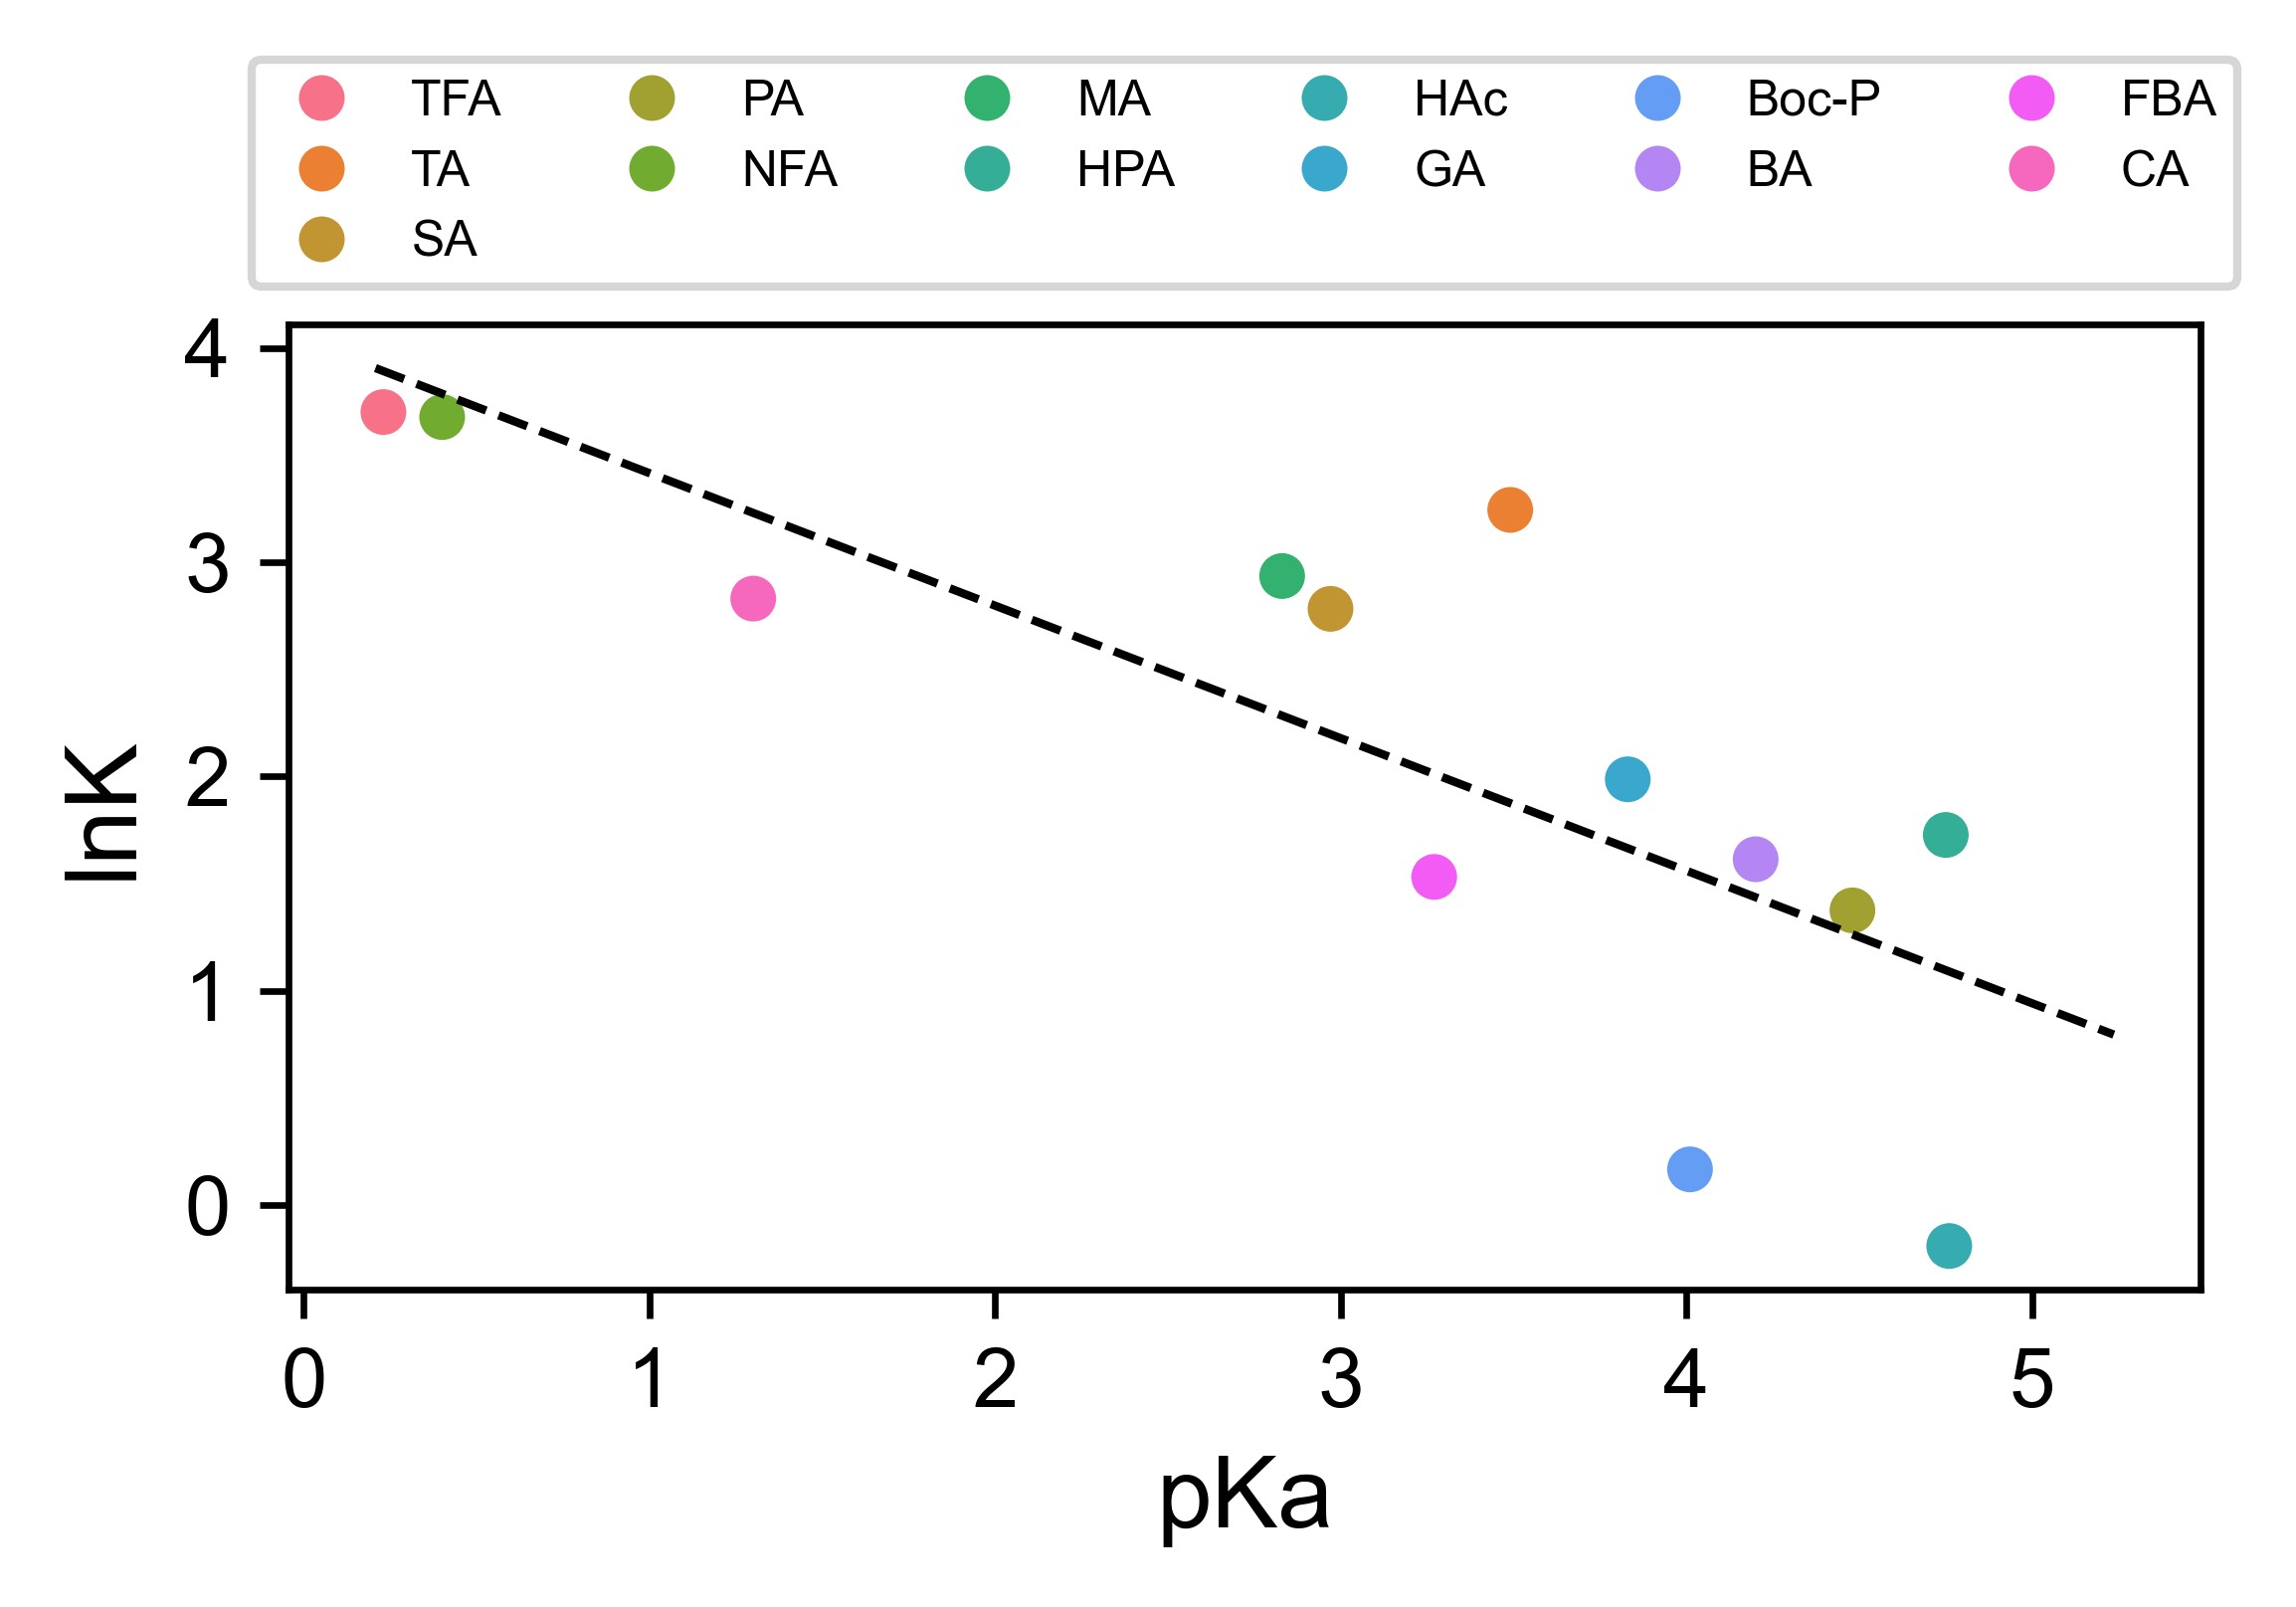

lnK_vs_pKa_basic
lnK = -4.55 +1.439·pKa
R²=0.79


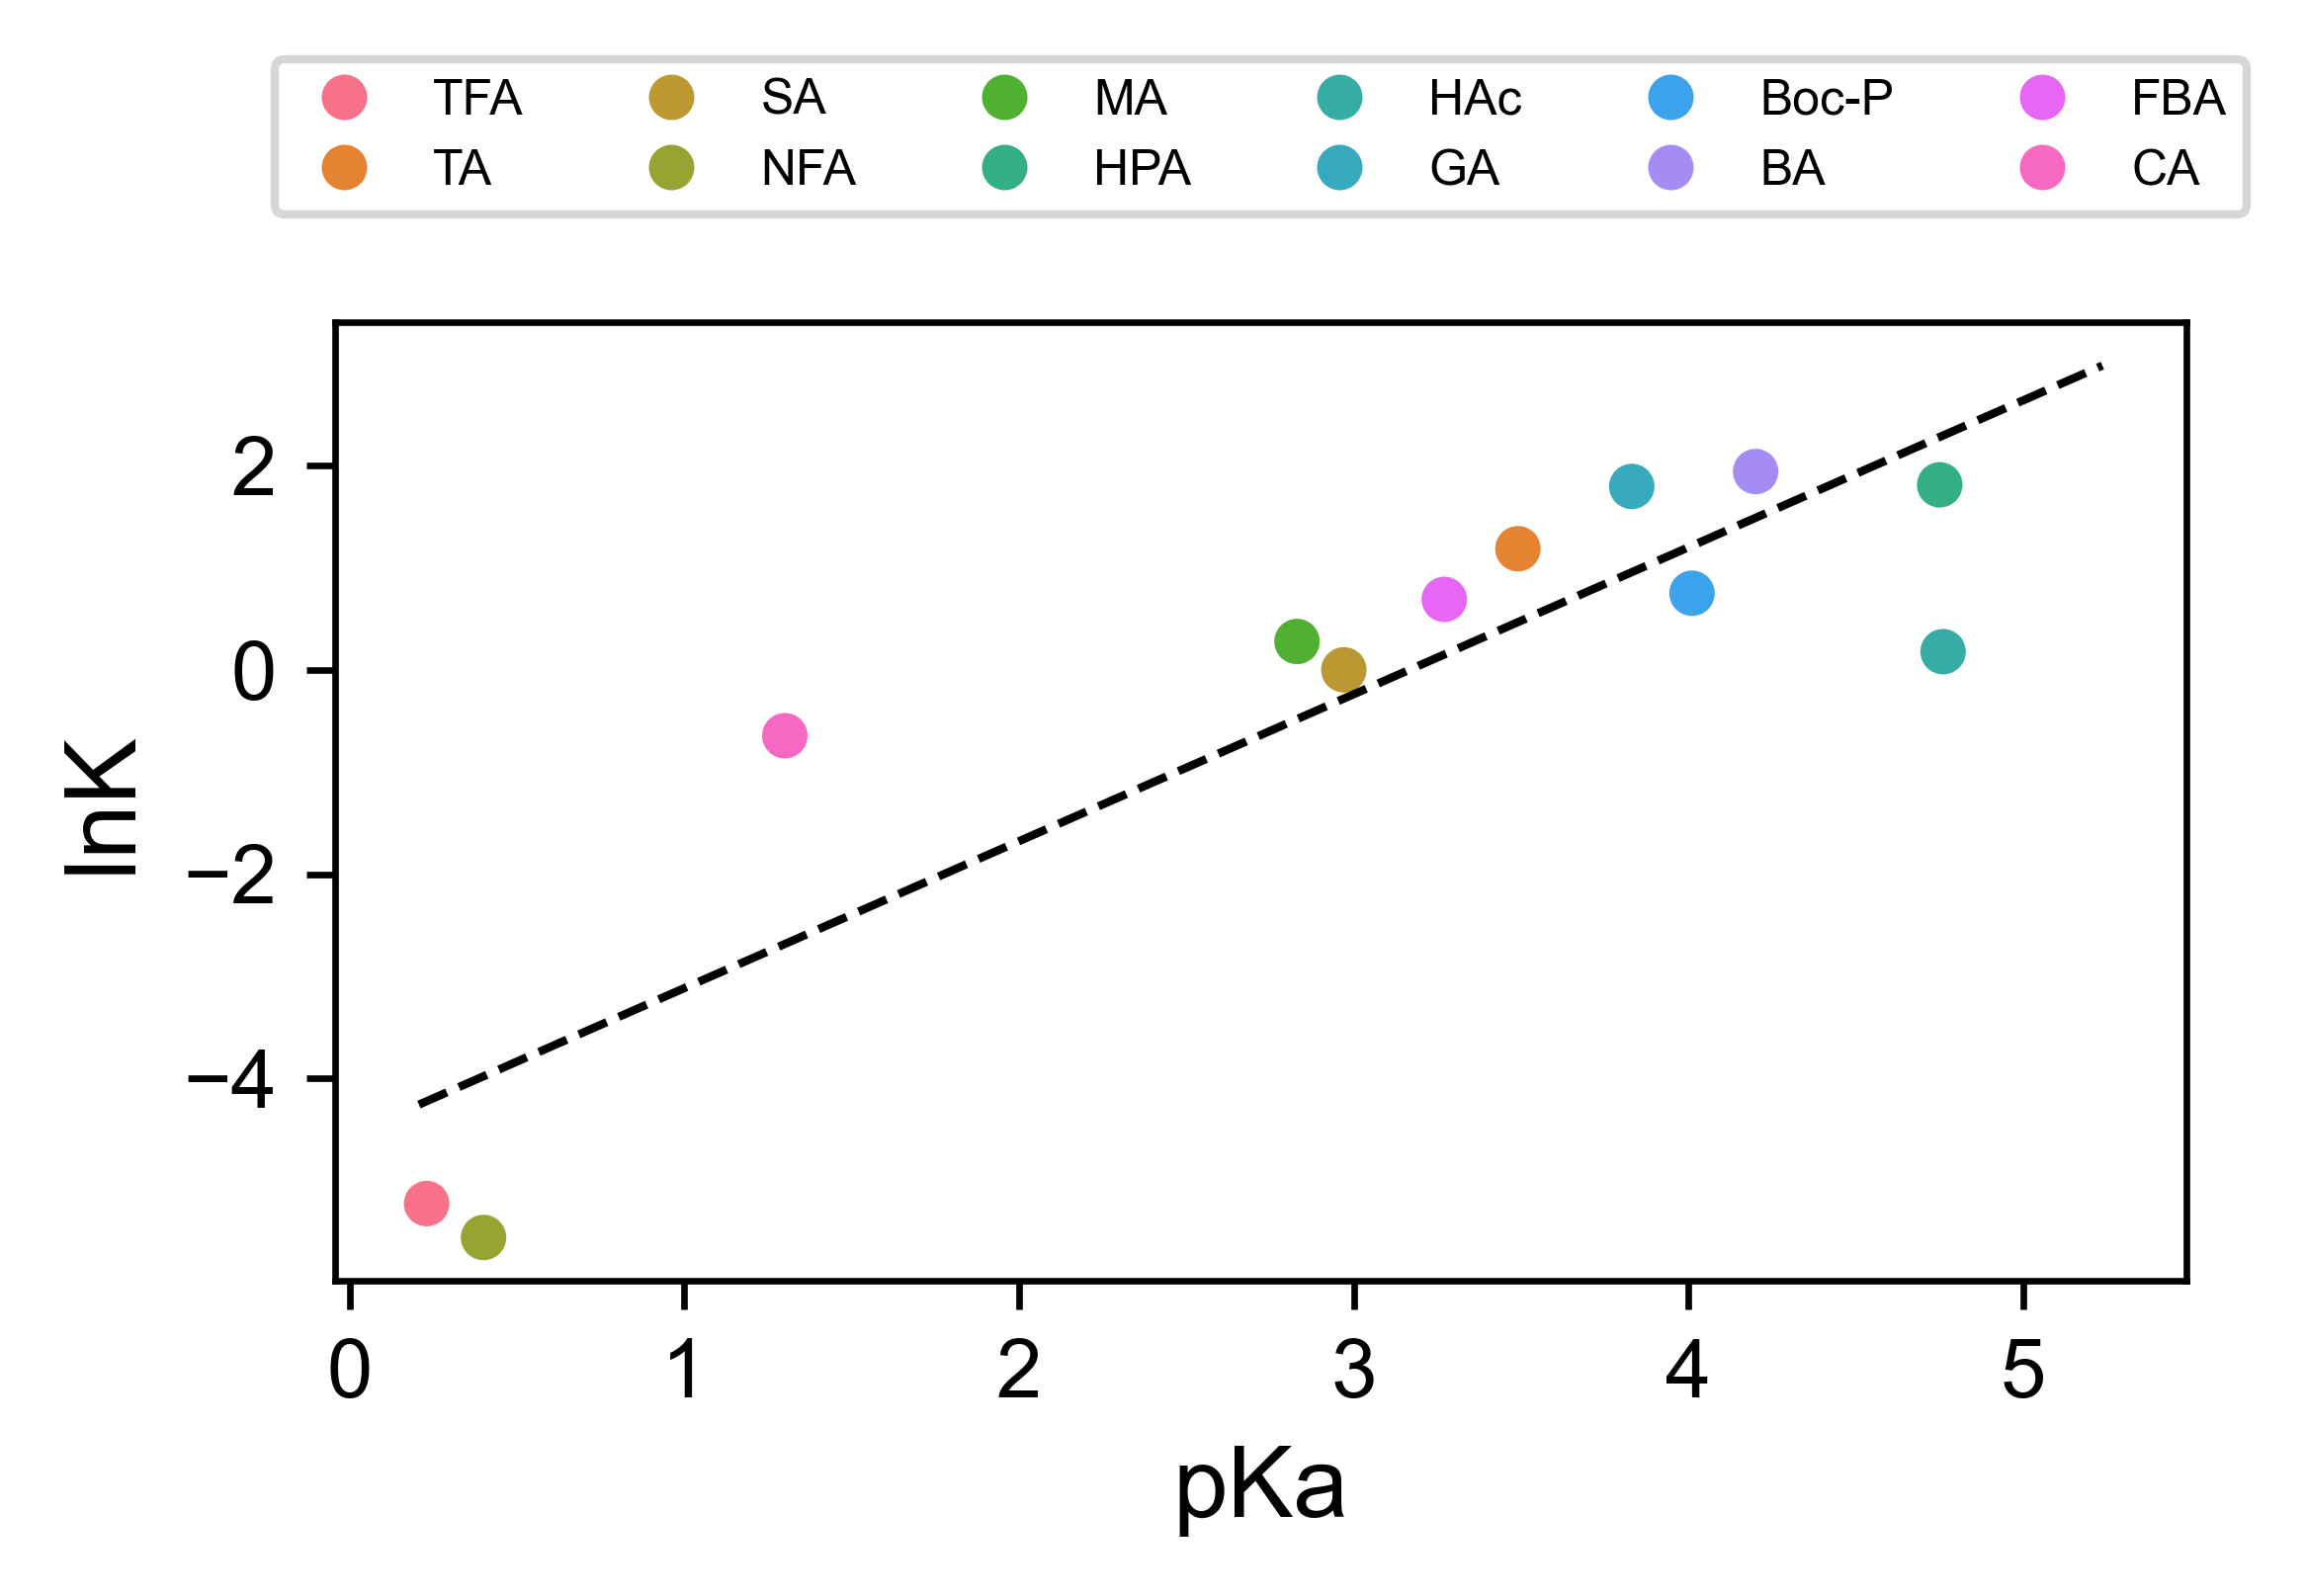

In [3]:
# lnK vs pKa (acidic & basic)
scatter_reg(acidic, "pKa", "lnK",
            "ln K vs pKa",
            "lnK_vs_pKa_acidic")

scatter_reg(basic,  "pKa", "lnK",
            "ln K vs pKa",
            "lnK_vs_pKa_basic")

In [4]:
df = pd.read_csv('./summary_df.csv')
df['lnK']=np.log(df['k'])
df["AplusB"] = df["A"] + df["B"]
acidic = df[(df["Experiment"] == "acidic")].copy()

basic = df[(df["Experiment"] == "basic")].copy()
basic  = df[(df["Experiment"] == "basic")  & (df["k"] >= 0.10)].copy()

# optionally merge them for "combined" analysis
combined = pd.concat([acidic, basic], ignore_index=True)

metrics     = ["f"]
descriptors = ["pKa", "Volume", "Number of Heavy Atoms", "L", "B1", "B5"]

def corr_matrix(df_in):
    return df_in[metrics + descriptors].corr().loc[metrics, descriptors]

corr_acidic   = corr_matrix(acidic)
corr_basic    = corr_matrix(basic)
corr_combined = corr_matrix(combined)

display(corr_acidic.round(2))
display(corr_basic.round(2))
display(corr_combined.round(2))

corr_all.iloc[2] = corr_acidic.round(2)
corr_all.iloc[5] = corr_basic.round(2)
corr_all.iloc[8] = corr_combined.round(2)

,pKa,Volume,Number of Heavy Atoms,L,B1,B5
f,-0.61,-0.45,-0.31,-0.21,-0.03,-0.4


,pKa,Volume,Number of Heavy Atoms,L,B1,B5
f,-0.13,-0.57,-0.59,-0.4,-0.49,-0.4


,pKa,Volume,Number of Heavy Atoms,L,B1,B5
f,-0.43,-0.49,-0.4,-0.28,-0.22,-0.39


f_vs_pKa_acidic
f = 0.98 -0.05393·pKa
R²=0.38


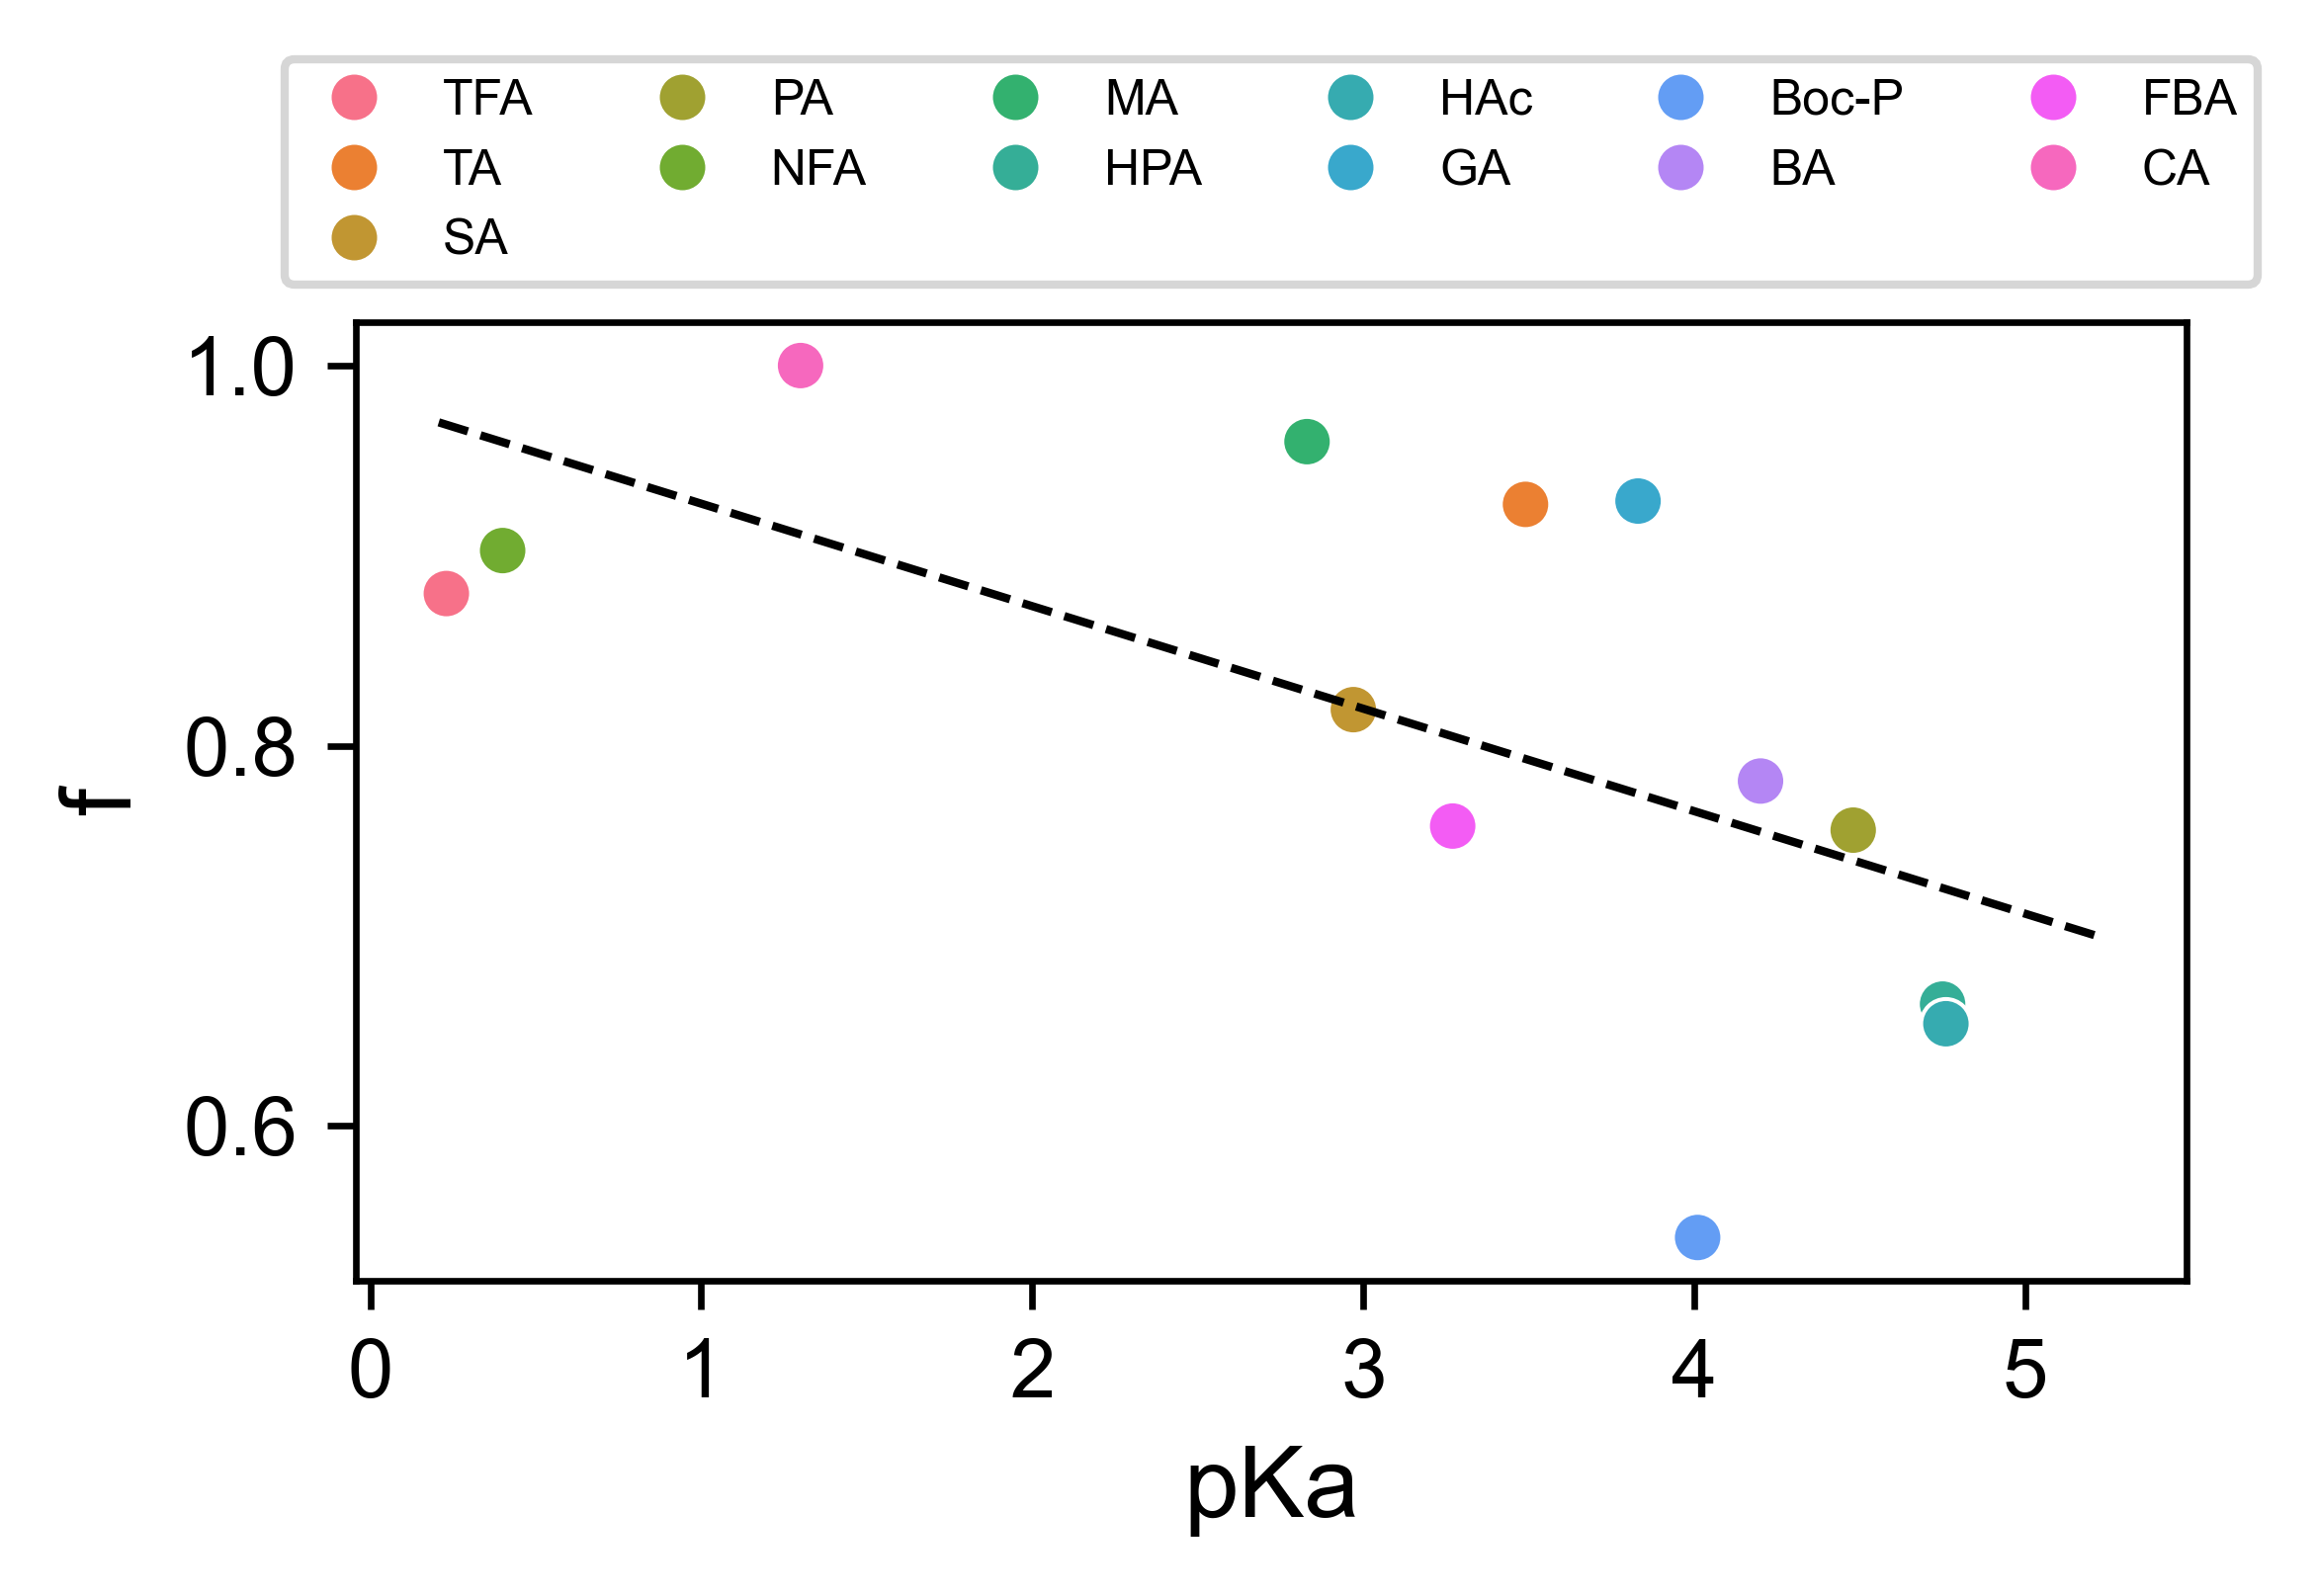

f_vs_volume_acidic
f = 0.98 -0.00137·Volume
R²=0.20


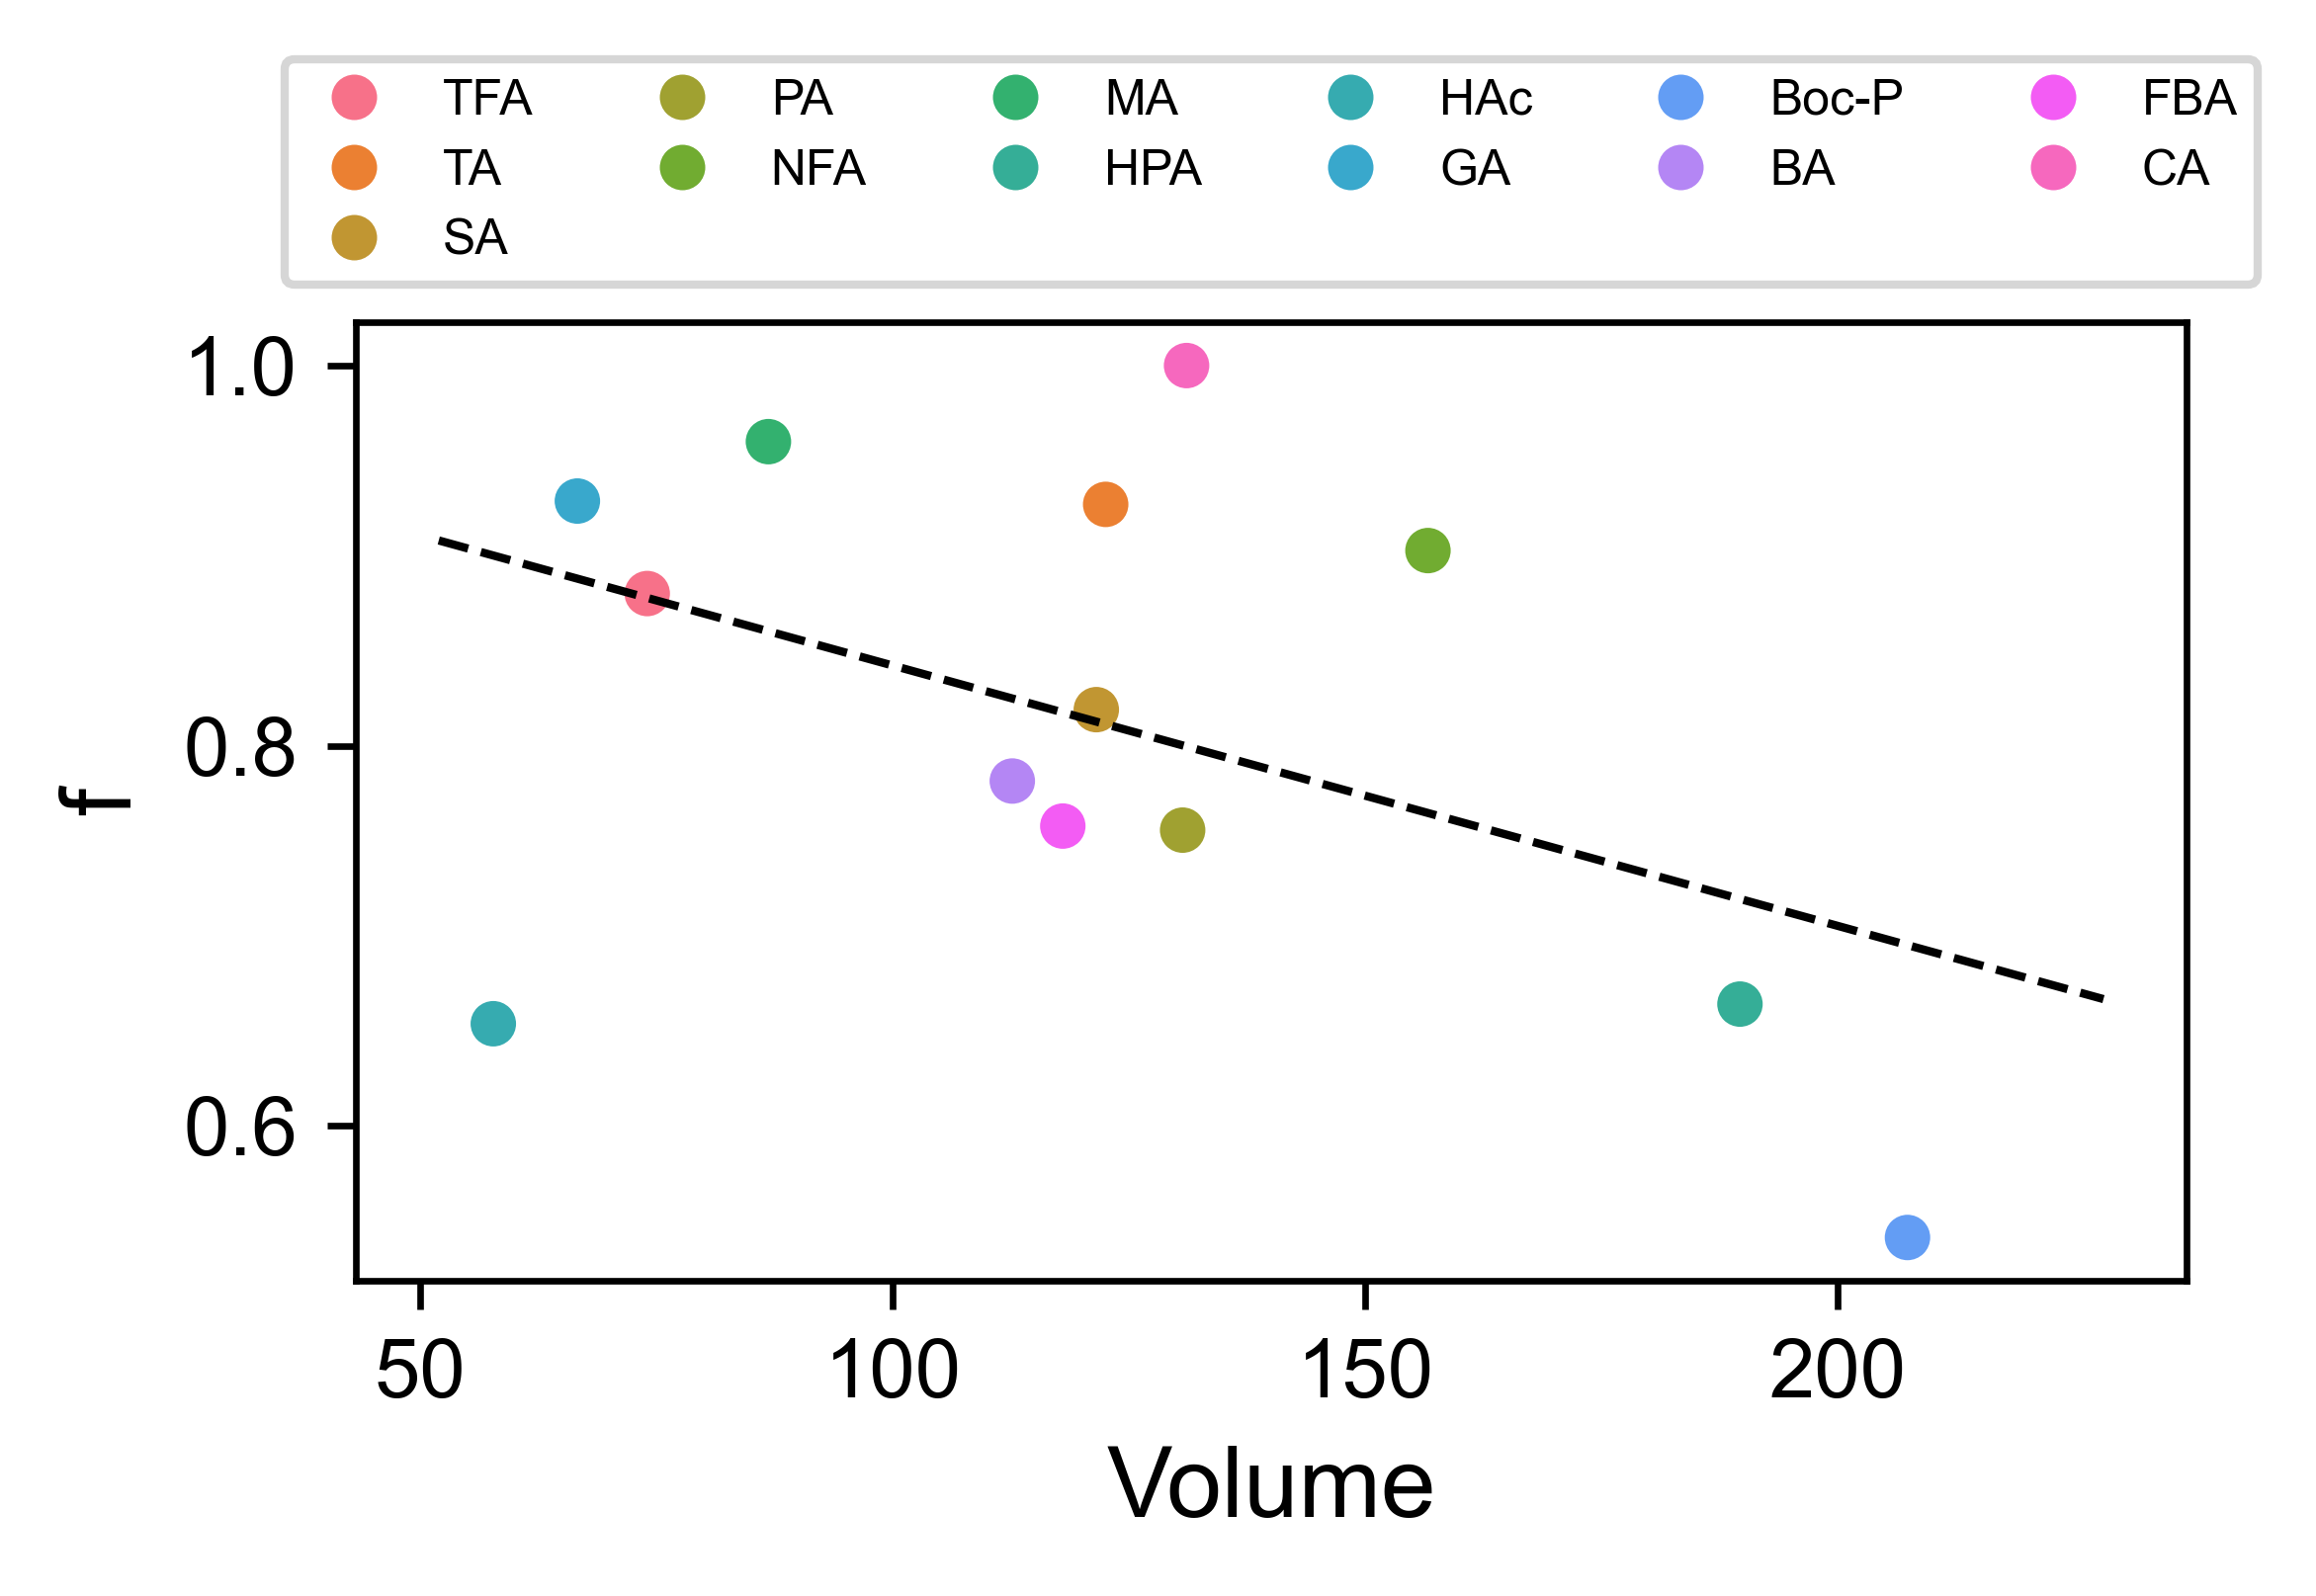

lnK_vs_Volume_basic
f = 0.98 -0.002086·Volume
R²=0.32


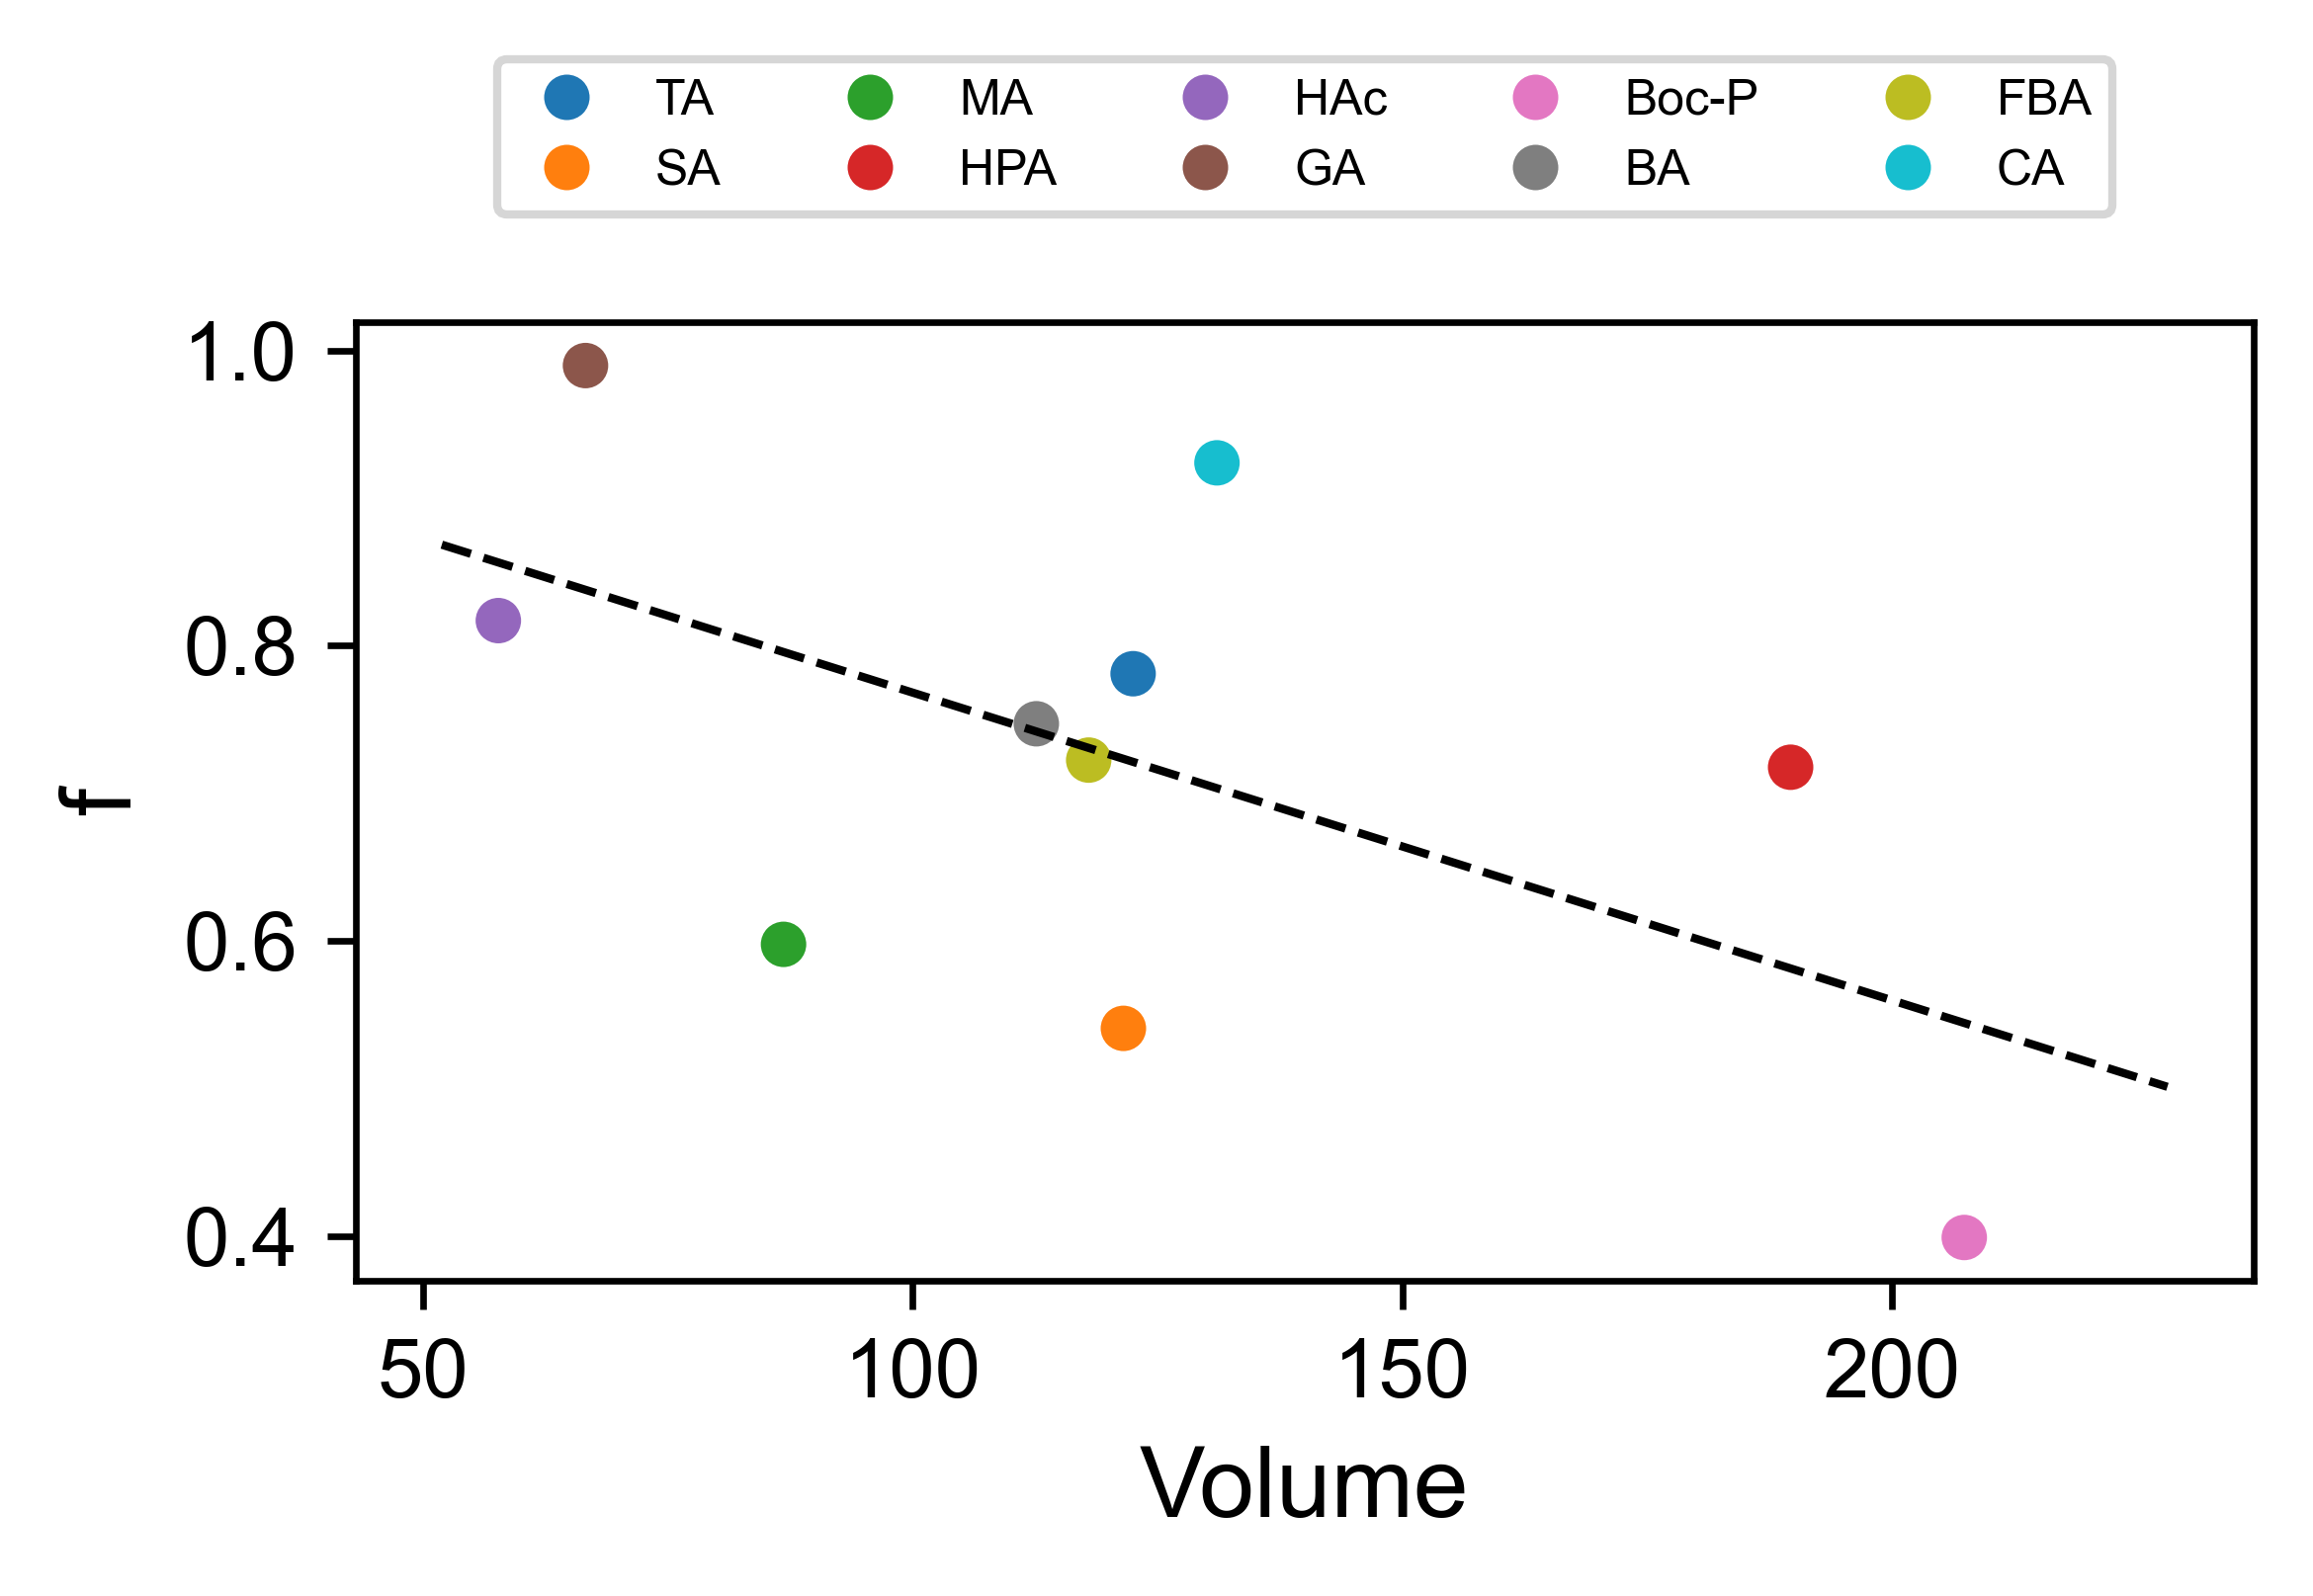

lnK_vs_Number of Heavy Atoms_basic
f = 1.00 -0.02999·Number of Heavy Atoms
R²=0.35


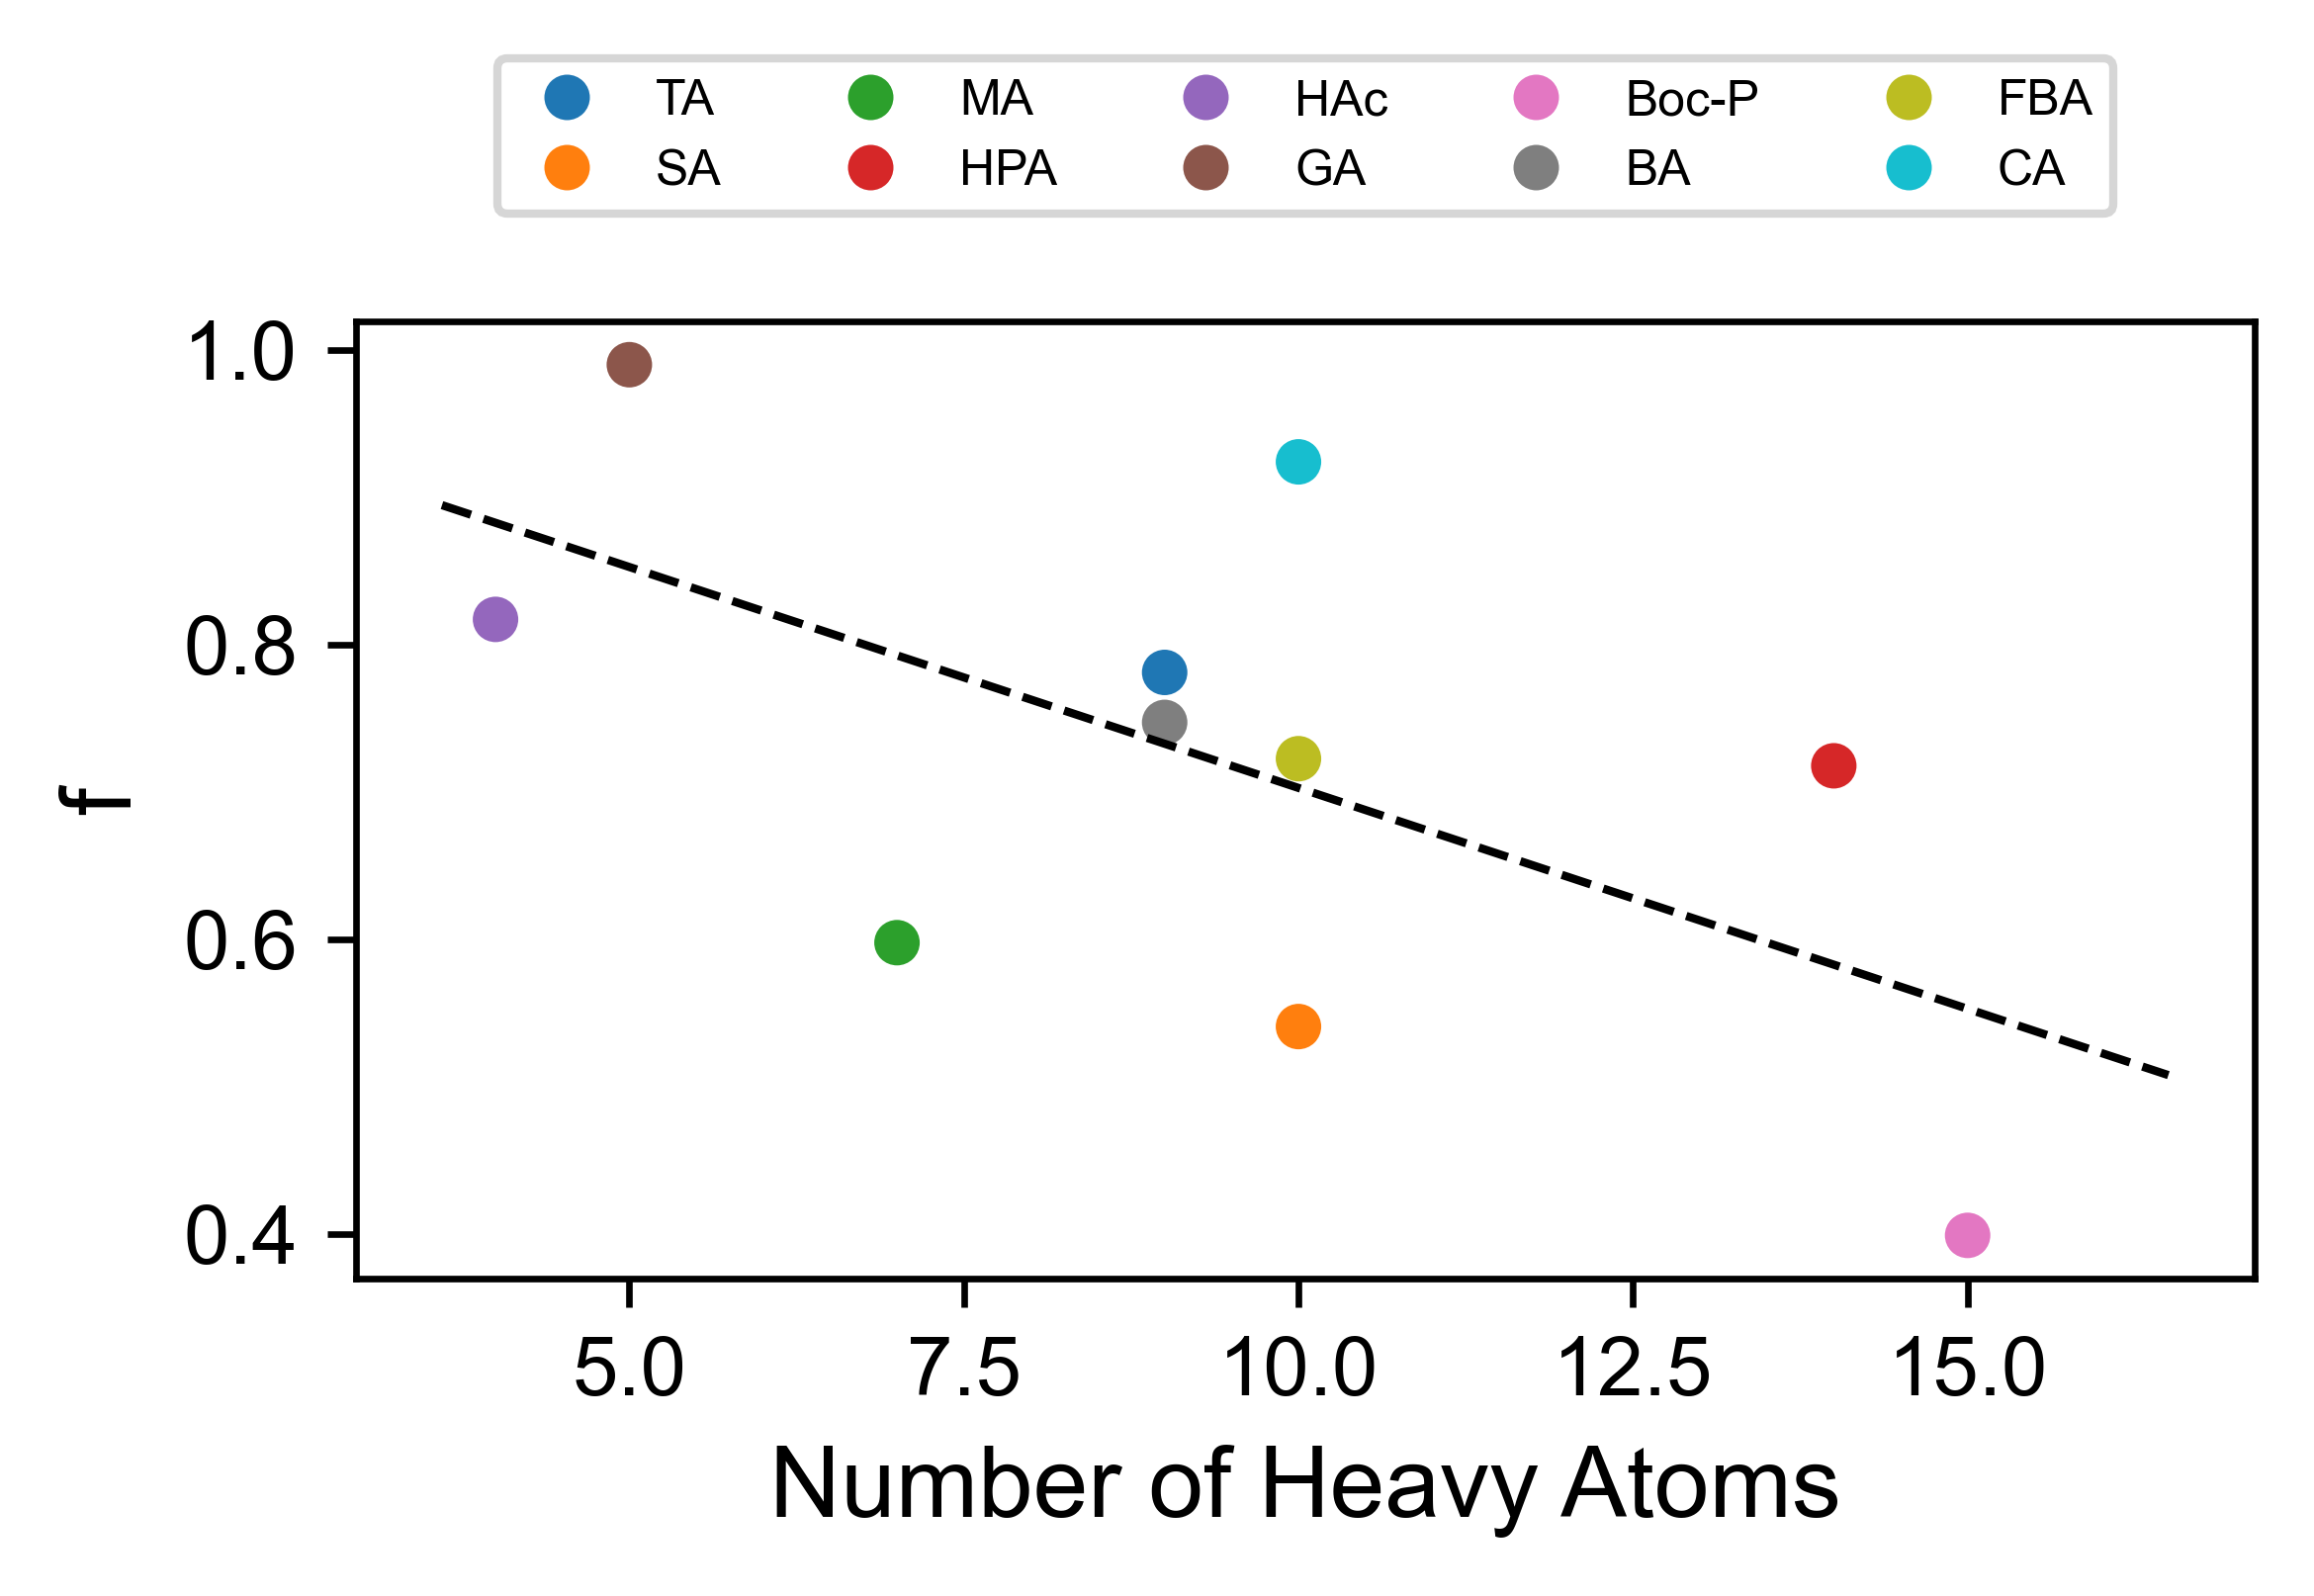

lnK_vs_L_basic
f = 1.01 -0.05212·L
R²=0.16


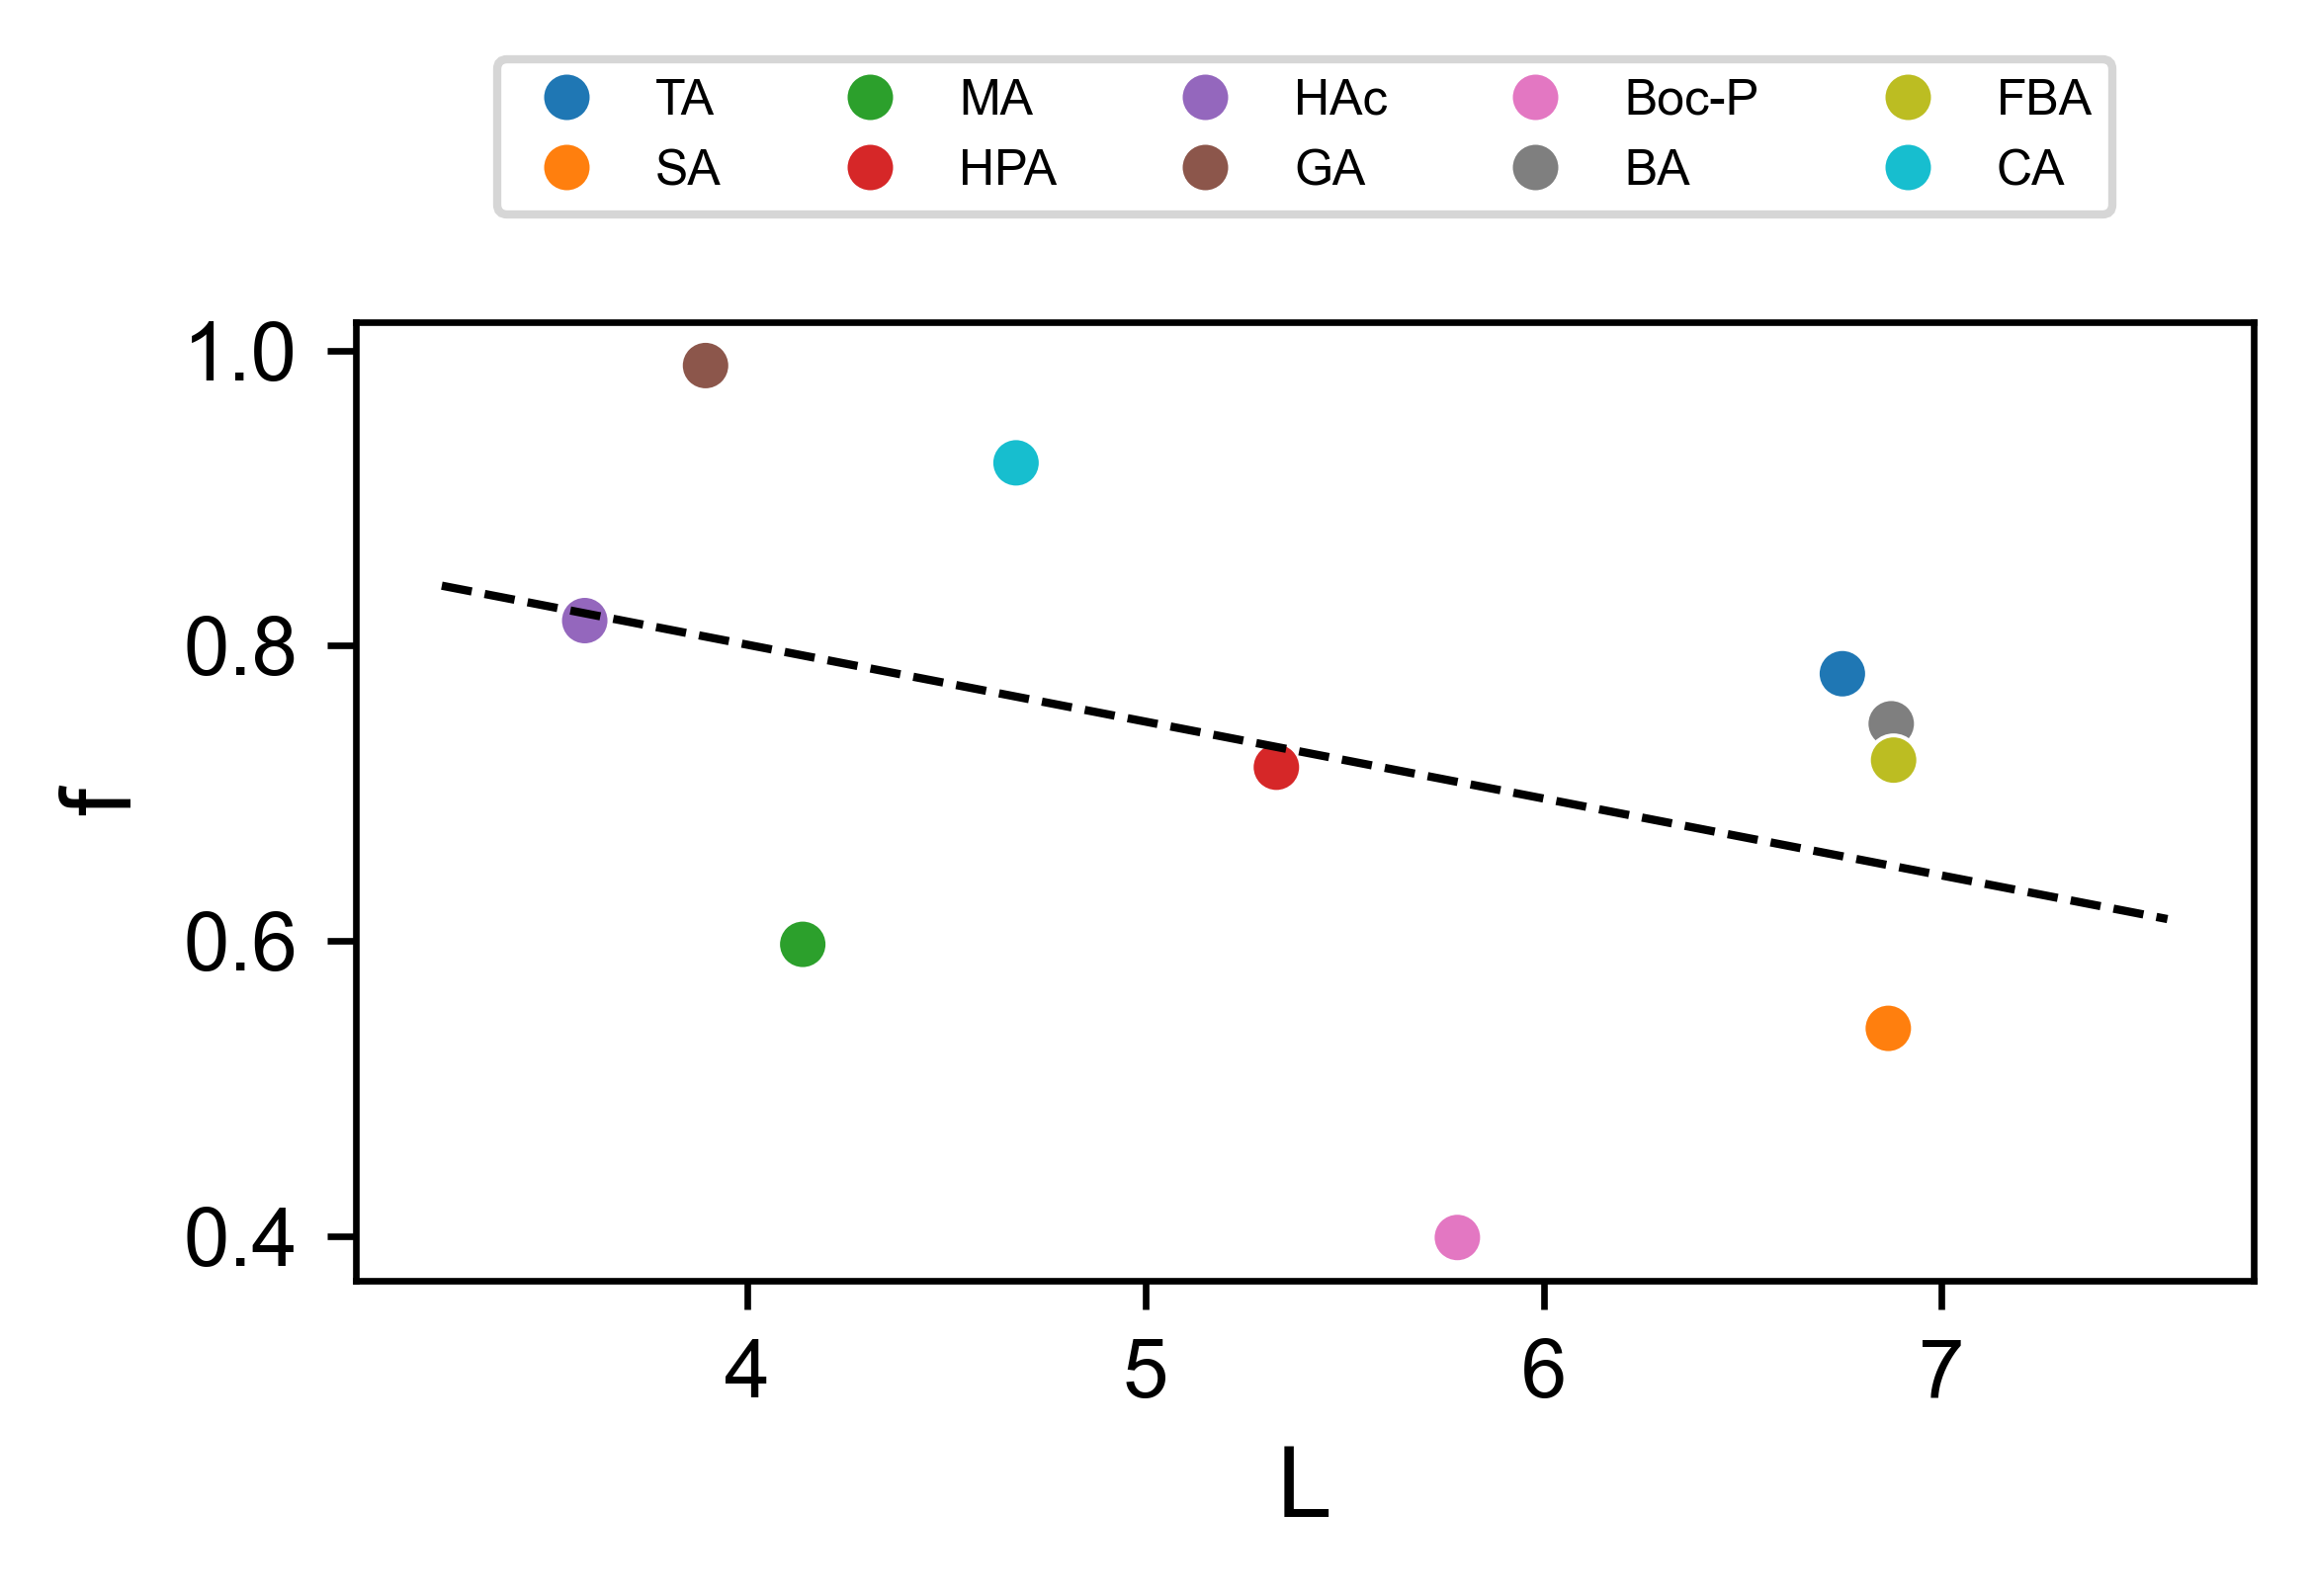

lnK_vs_B1_basic
f = 1.42 -0.3769·B1
R²=0.24


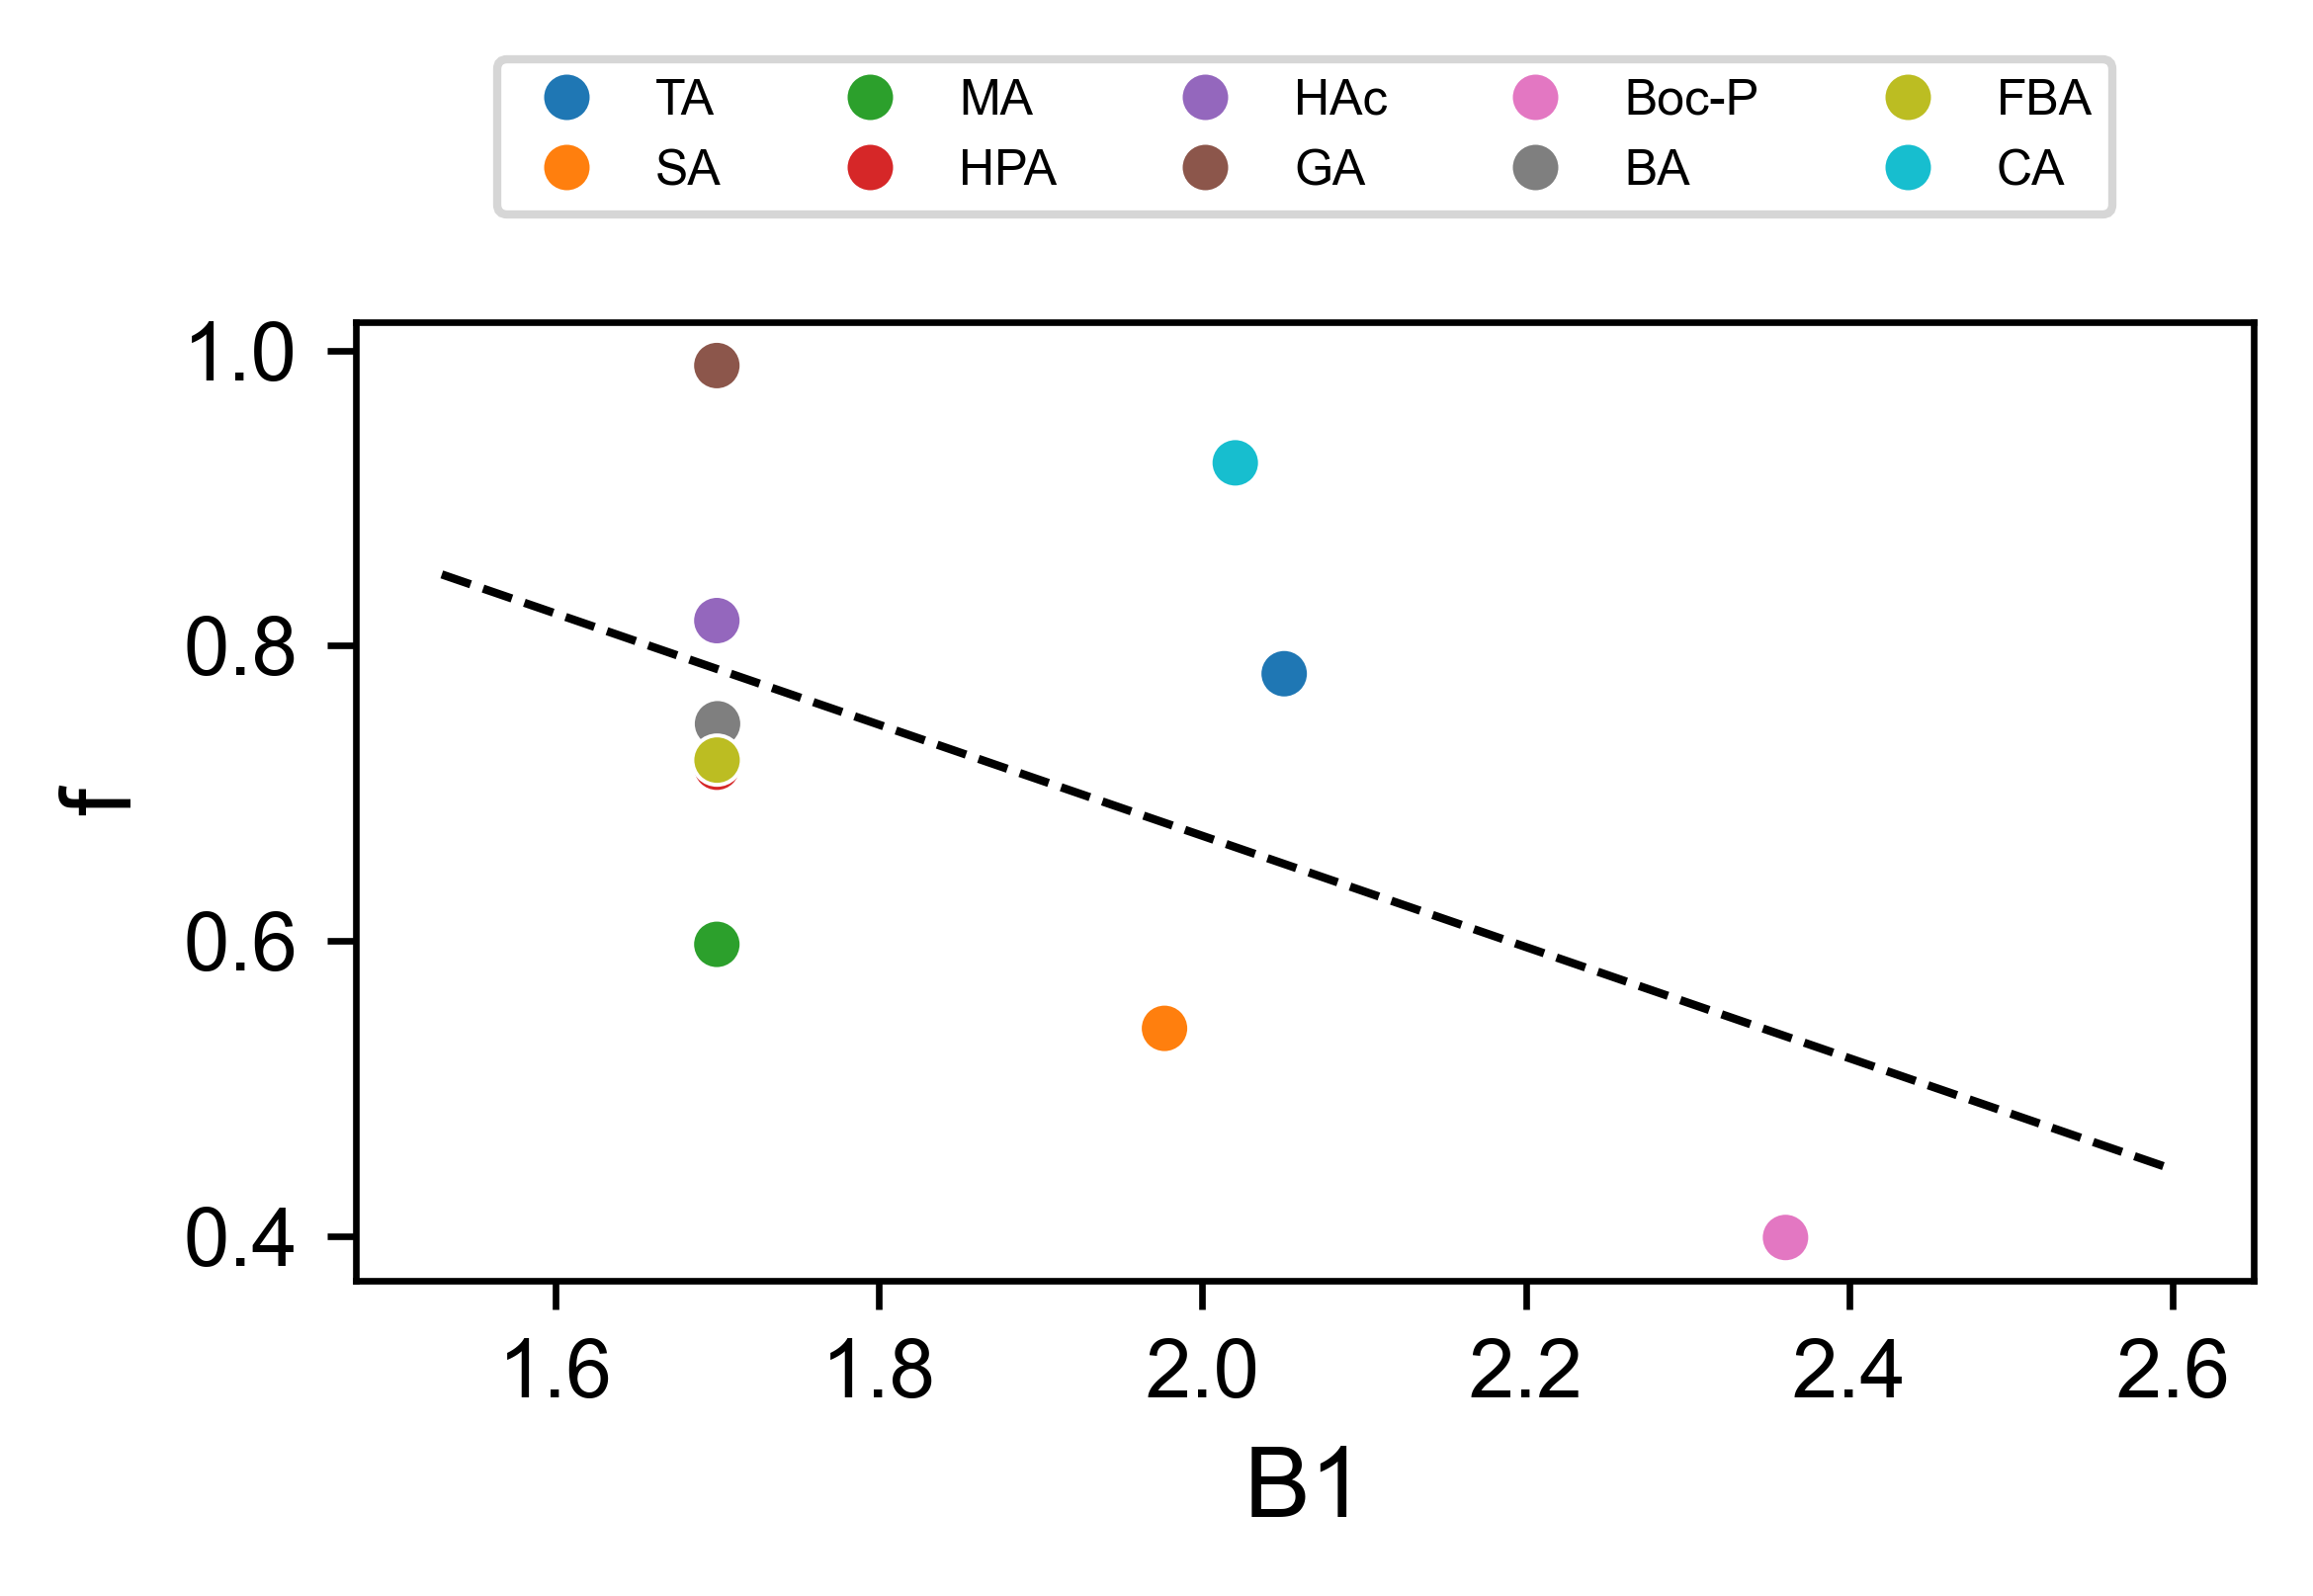

lnK_vs_B5_basic
f = 0.87 -0.02893·B5
R²=0.16


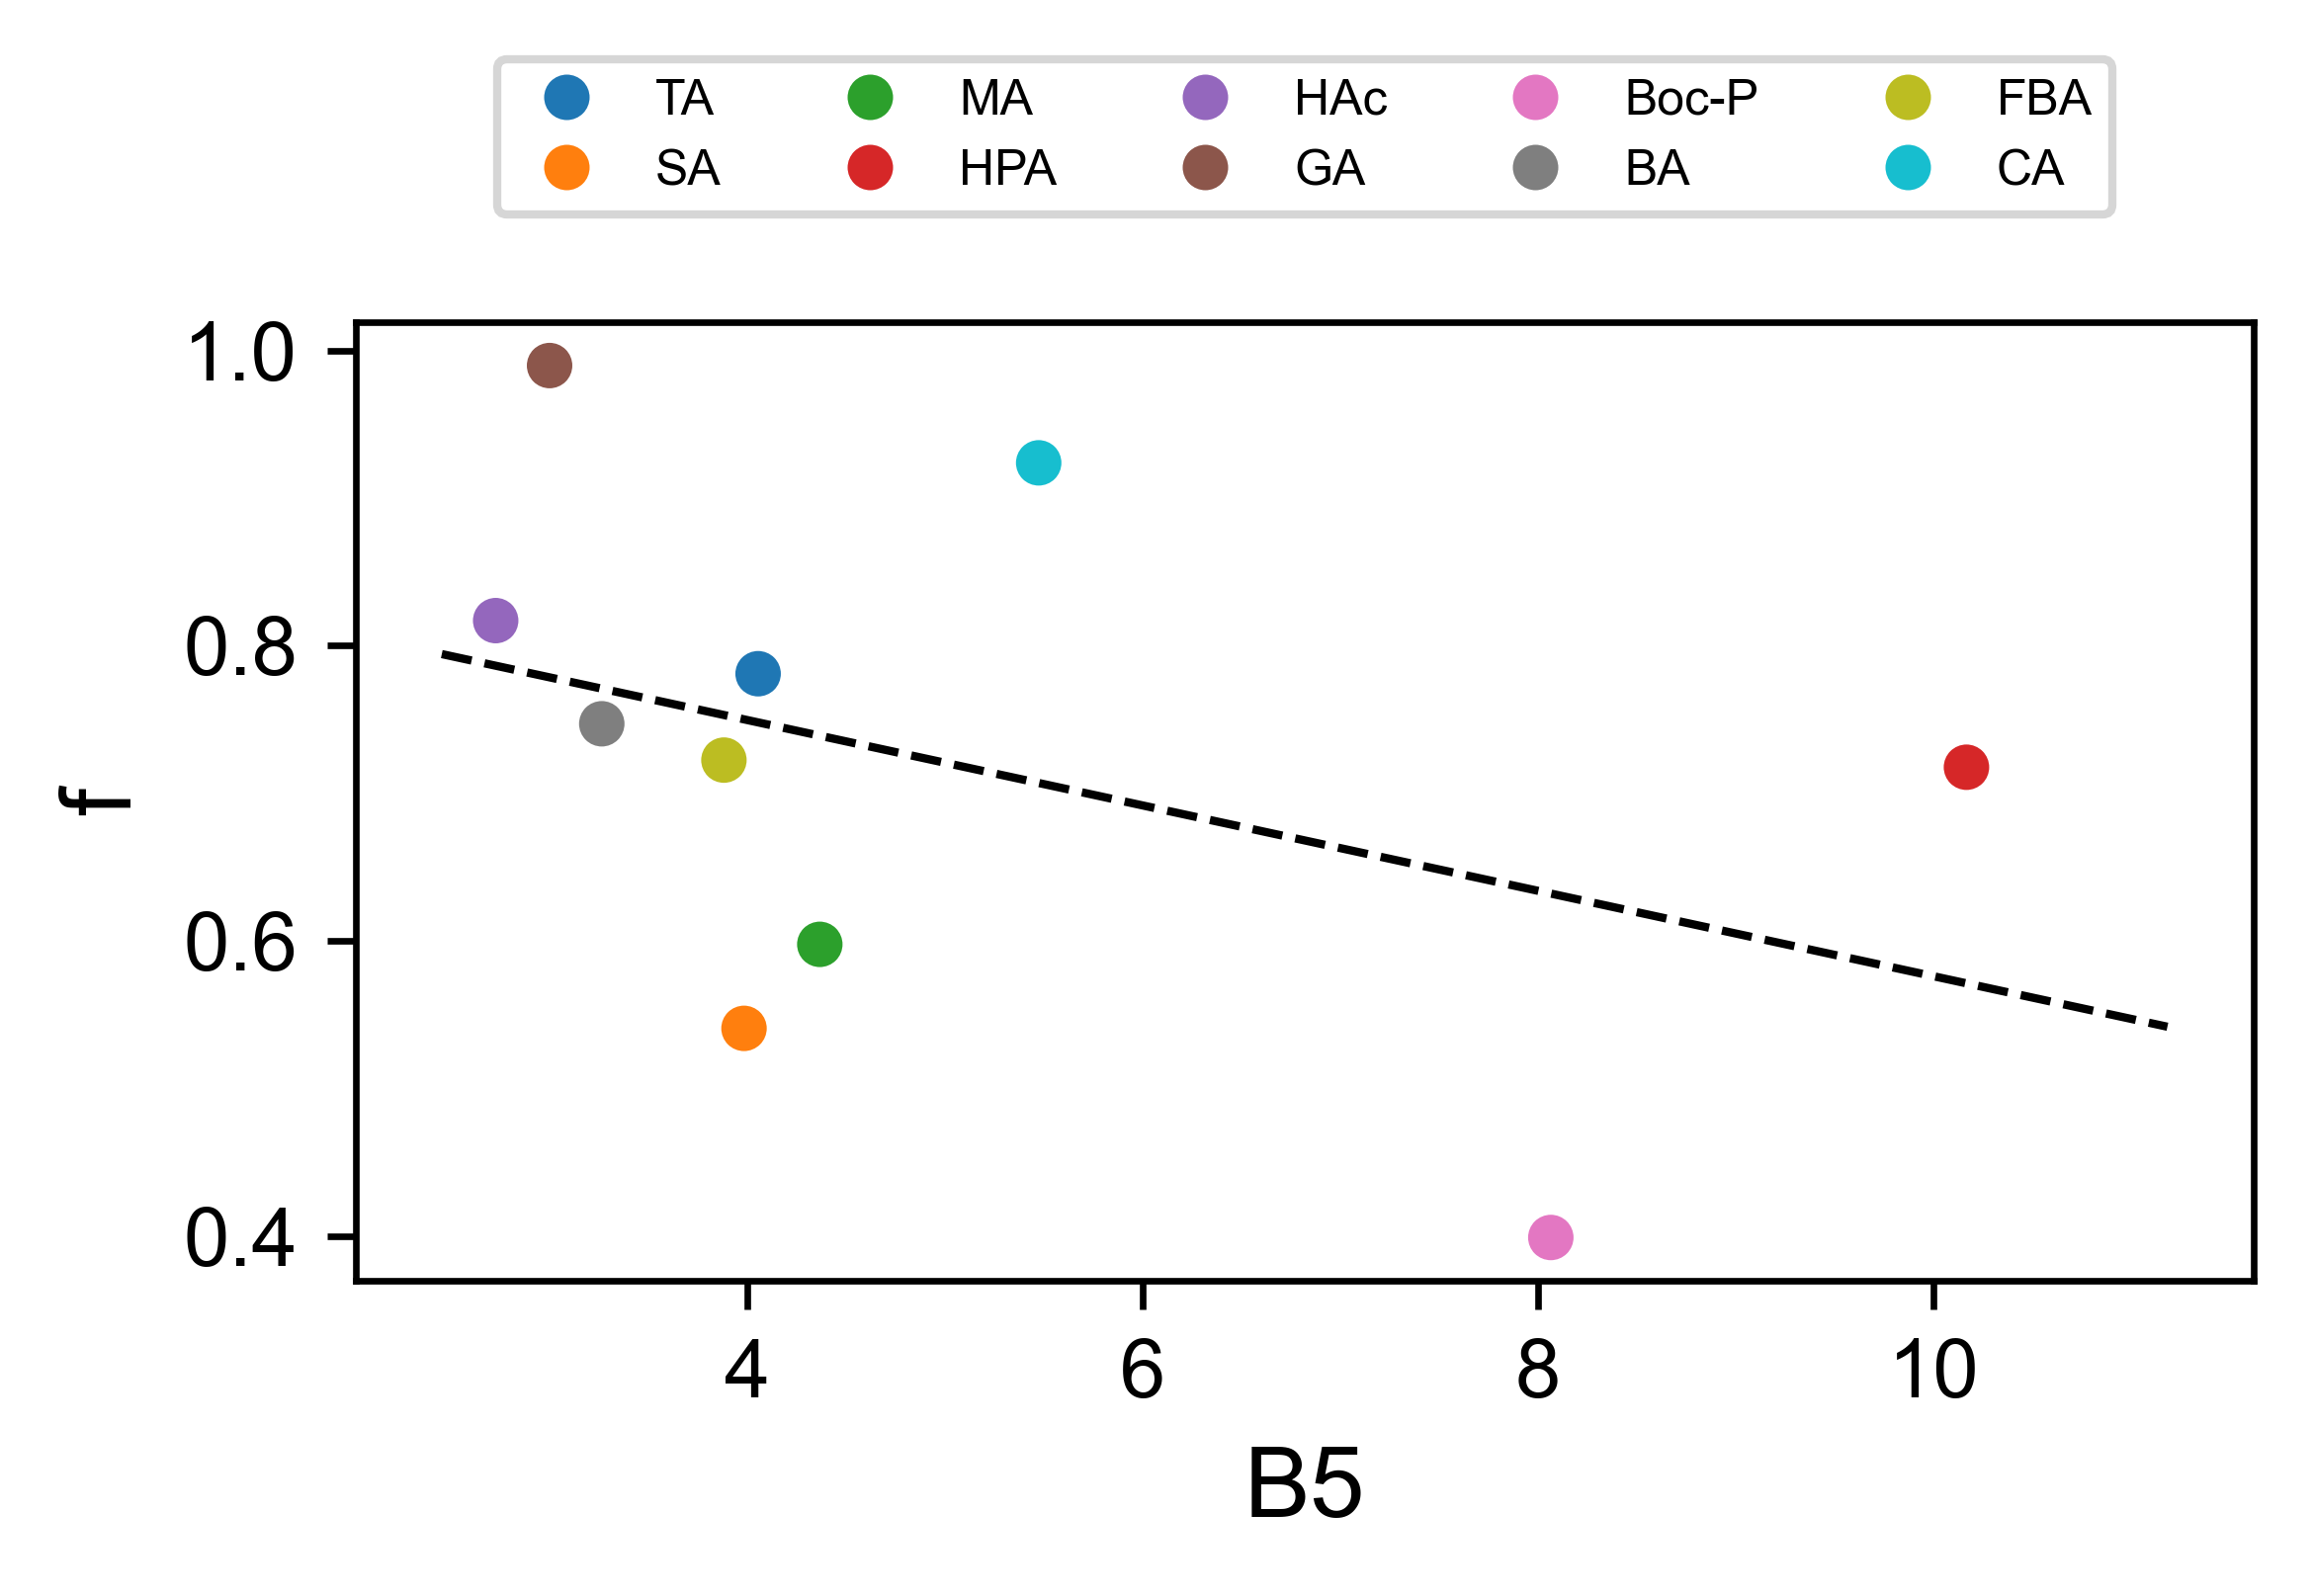

In [5]:
# lnK vs pKa (acidic & basic)
scatter_reg(acidic, "pKa", "f",
            "f vs pKa",
            "f_vs_pKa_acidic", if_legend = False)

# lnK vs pKa (acidic & basic)
scatter_reg(acidic, "Volume", "f",
            "f vs volume",
            "f_vs_volume_acidic", if_legend = False)

for volume_descriptor in ["Volume", "Number of Heavy Atoms", "L", "B1", "B5"]:
    scatter_reg(basic,  volume_descriptor, "f",
                f"f vs {volume_descriptor}",
                f"lnK_vs_{volume_descriptor}_basic", if_legend = False)

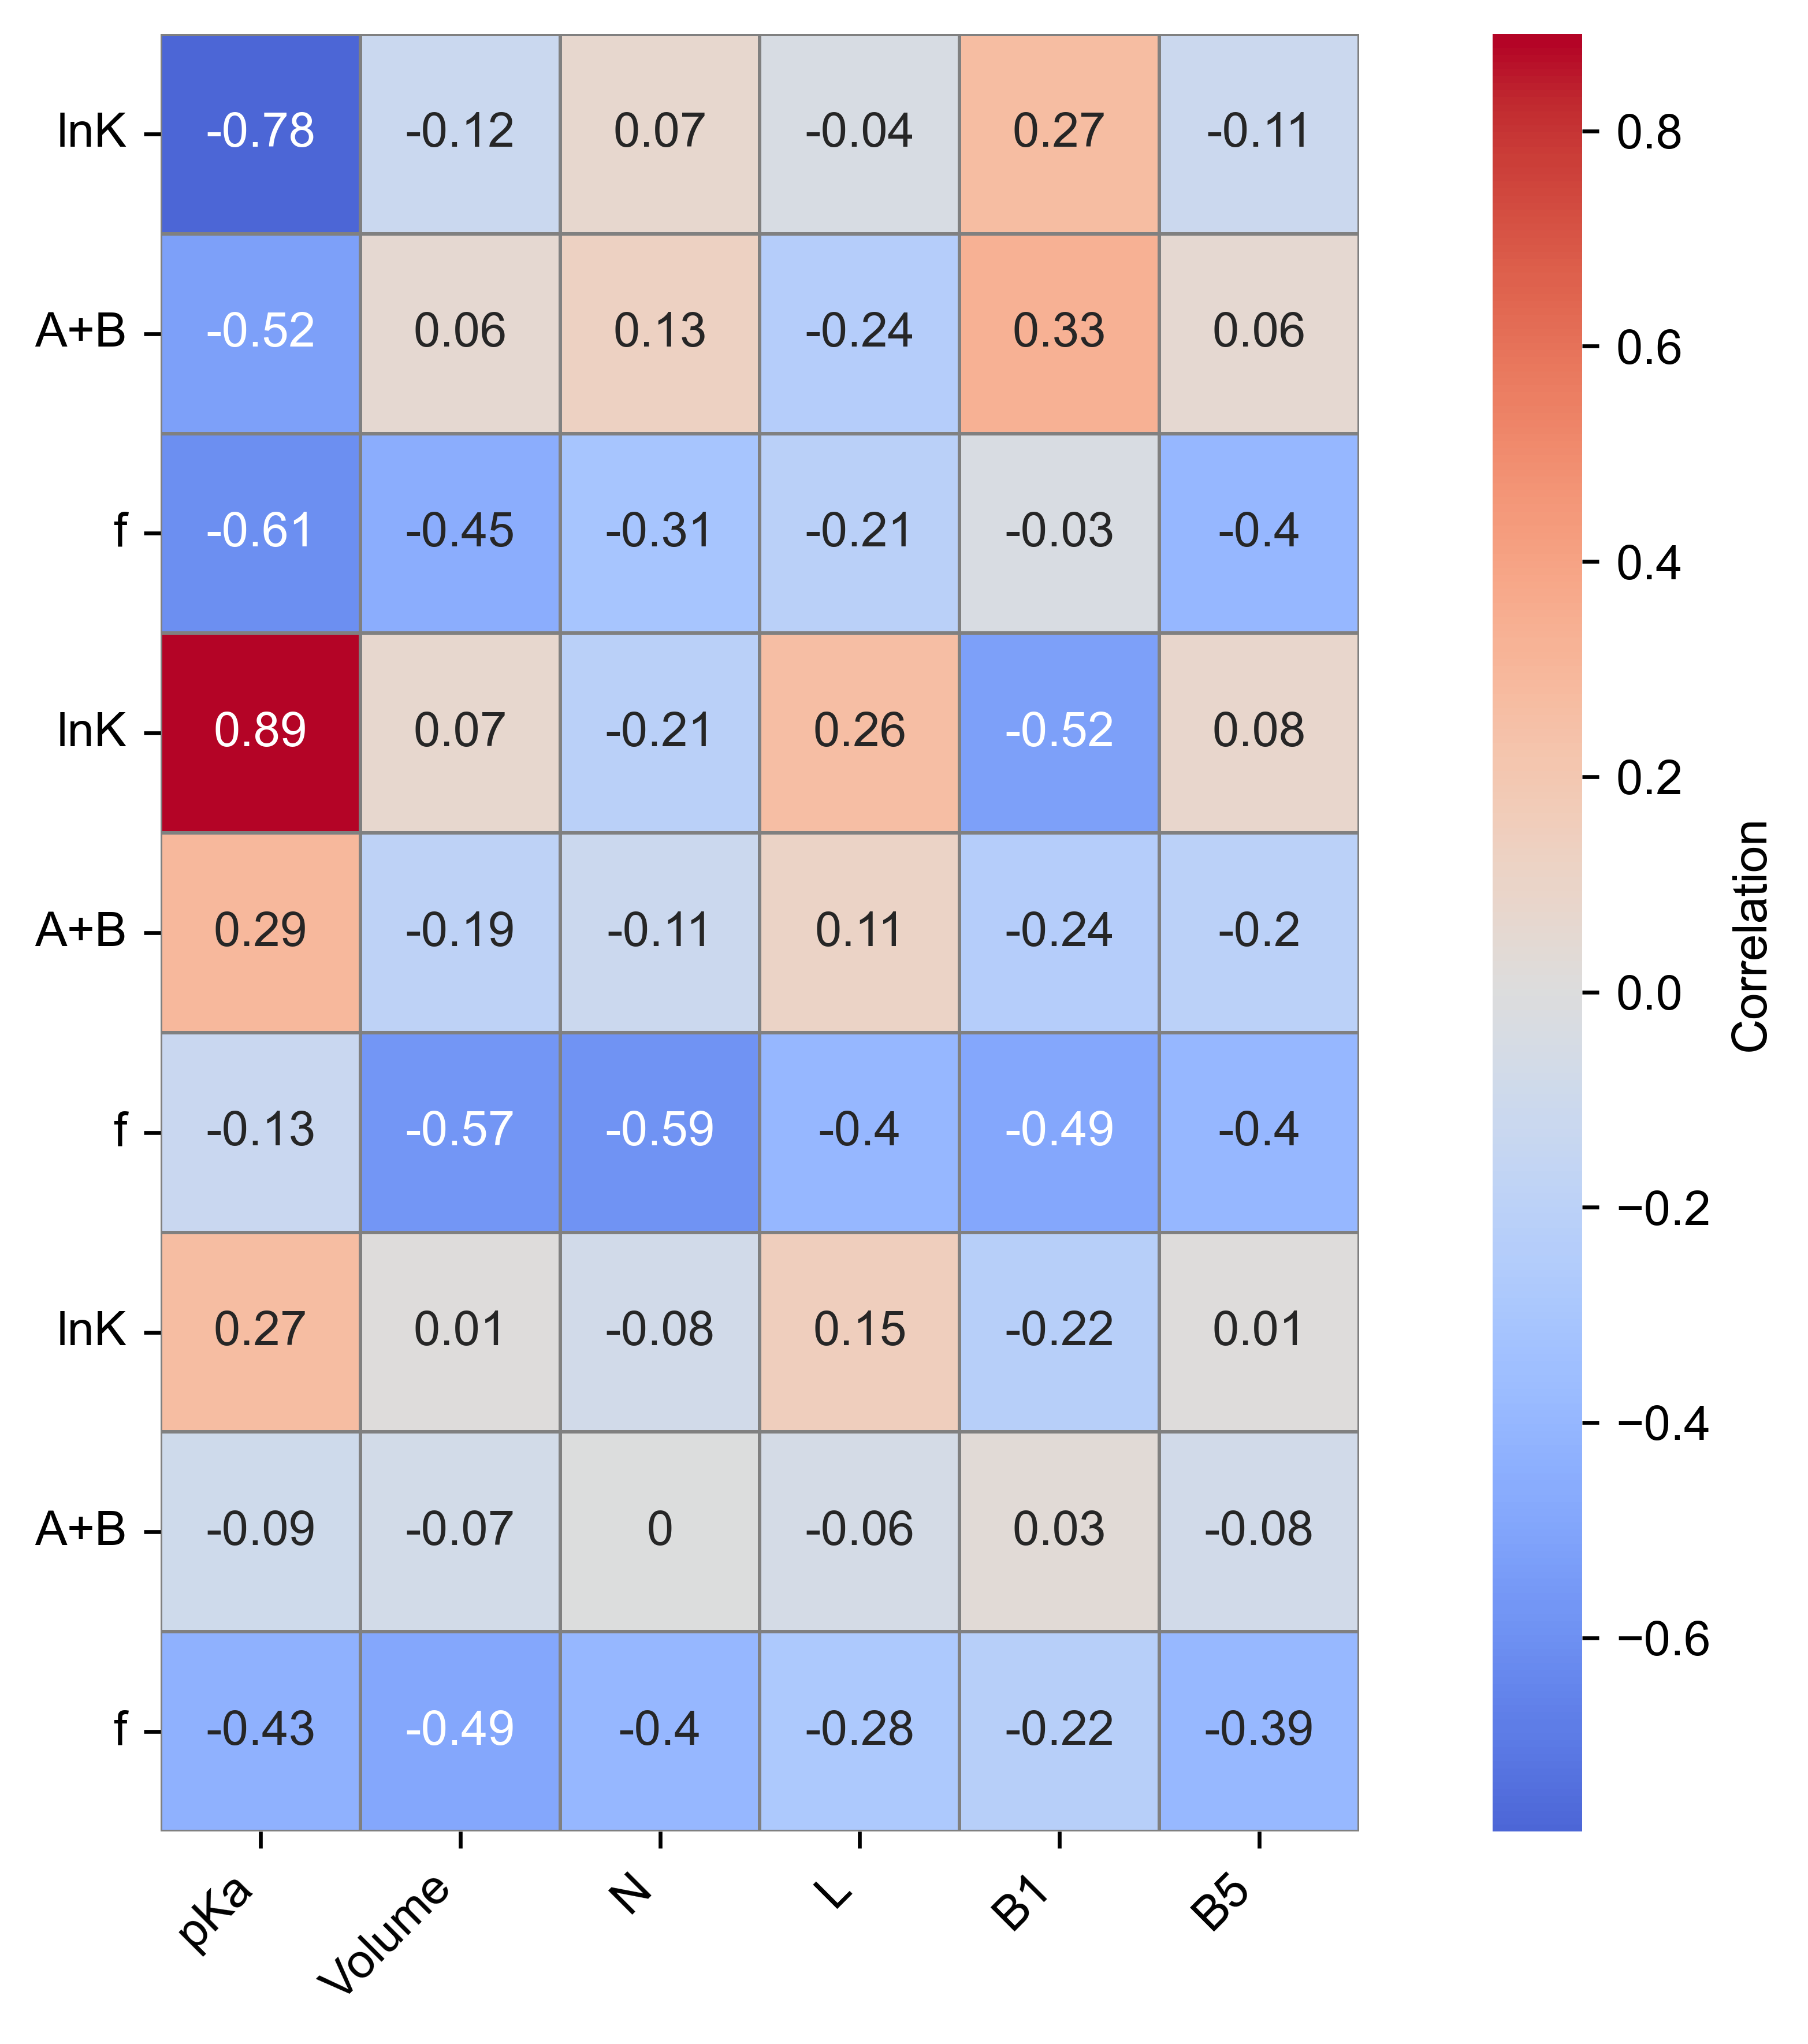

In [6]:
# Plot
corr_all = corr_all.rename(columns={"Number of Heavy Atoms": "N"})

plt.figure(figsize=(8, 6), dpi=600)
sns.heatmap(corr_all, annot=True, cmap="coolwarm", center=0, square=True, 
            cbar_kws={"label": "Correlation"}, linewidths=0.5, linecolor='gray')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  # Keep y labels horizontal for easier reading

plt.tight_layout()
plt.show()